<a href="https://colab.research.google.com/github/newgenesys/Intrusion-Detection-Using-ML/blob/main/ML_Intrusion_Detection_DRL_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# University of Buea

![](http://ubuea.cm/wp-content/uploads/2014/09/logo2.png)

## Faculty of Engineering and Technology
## Computer Engineering
## ML Techniques for Intrusion Detection
## Olouge Eya Ekolle
## FE15P018


---


### Datasets
### KDD-99
### UNSW-NB15
### CSE-CIC-IDS2018
### NSL-KDD

In [ ]:
!pip install sklearn

In [ ]:
import sys
print(sys.version_info)

sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)


The above code imports the python system library that allows us to perform system operations.
The next line prints the python version which is important for us to know in order to be sure of the oissubilitie of the language for the task.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

The above lines import all the required libraries needed for the implementation.

# Importing KDD-99 Data

In [ ]:
kdd_99_features = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted',
'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count',
'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 
                   'intrusion_type']
# Source: http://kdd.ics.uci.edu/databases/kddcup99/kddcup.names
print(len(kdd_99_features))

42


In [ ]:
kdd_99_features[-5:]

['dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'intrusion_type']

According to the data source, the above list maps all the features found in the dataset. The list has been created as it will be used for further processing.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Since the code and dataset is on Google Collaboratory, it is required to mount the google drive in order to access the dataset from the notebook on google collaboratory. 

In [ ]:
kdd_99_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kdd99/kddcup.data_10_percent_corrected', names = kdd_99_features, header=None)

In this above cell, pandas read_csv method has been used to read the top 10 percent corrected copy of the dataset which is what we need as input data for our model.

In [ ]:
print("KDD99 first 15 rows")
kdd_99_data.head(15)

KDD99 first 15 rows


duration protocol_type  ... dst_host_srv_rerror_rate intrusion_type
0          0           tcp  ...                      0.0        normal.
1          0           tcp  ...                      0.0        normal.
2          0           tcp  ...                      0.0        normal.
3          0           tcp  ...                      0.0        normal.
4          0           tcp  ...                      0.0        normal.
5          0           tcp  ...                      0.0        normal.
6          0           tcp  ...                      0.0        normal.
7          0           tcp  ...                      0.0        normal.
8          0           tcp  ...                      0.0        normal.
9          0           tcp  ...                      0.0        normal.
10         0           tcp  ...                      0.0        normal.
11         0           tcp  ...                      0.0        normal.
12         0           tcp  ...                      0.0        normal.
13         0           tcp  ...                      0.0        normal.
14         0           tcp  ...                      0.0        normal.

[15 rows x 42 columns]

In order to have an idea as to the content of the dataset, we printed above the first 15 records with all the columns showing. As it can be seen, some of the features hold strings while others hold integers, some are floating point numbers.

In [ ]:
print('KDD99: # of data points are:', kdd_99_data.shape[0])
print("-"*20)
print('KDD99: # of features are:', kdd_99_data.shape[1])
print("-"*20)
print('KDD99: Some features:', kdd_99_features[:10])

KDD99: # of data points are: 494021
--------------------
KDD99: # of features are: 42
--------------------
KDD99: Some features: ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot']


Furthermore, we printed the number of datapoints in the dataset, the number features found in the original dataset and then printed the output of the top 10 features.
According to the output above, the dataset consist of 494021 total data points, 42 features in the dataset.

In [ ]:
kdd_99_output = kdd_99_data['intrusion_type'].values
kdd_99_labels = set(kdd_99_output)
print('KDD99 different type of output labels are:',kdd_99_labels)

KDD99 different type of output labels are: {'perl.', 'buffer_overflow.', 'ipsweep.', 'imap.', 'loadmodule.', 'smurf.', 'satan.', 'teardrop.', 'rootkit.', 'neptune.', 'phf.', 'portsweep.', 'pod.', 'multihop.', 'warezclient.', 'ftp_write.', 'nmap.', 'guess_passwd.', 'land.', 'back.', 'warezmaster.', 'spy.', 'normal.'}


In this study, subject to our analysis, we are interested in the intrusion types for our output variable or dependent variable. In order to know he versious unique classes this variable holds it is important to display them. In the above cell, we have done so using the values from the dataframe, then use the python set method to convert the list into a set thereby ensuring there are no repeated items in the output. This way we are able to identify that, the dependent variable has 23 unique categories.

# KDD99 Data Cleaning

In [ ]:
# check for nulls
print('Null values in the dataset are: ',len(kdd_99_data[kdd_99_data.isnull().any(1)]))
kdd_99_data.drop_duplicates(subset=kdd_99_features, keep='first', inplace=True) # Drop duplicates and keep first occurrence
kdd_99_data.shape

Null values in the dataset are:  0


(145586, 42)

As it is required for every data science related task, we have to check if there are any null values in our data set and then drop them if it does not significantly affect the balance in our dataset.

In [ ]:
# Store the data into a pickle file so subsequently one can load it without going through the cleaning step again
kdd_99_data.to_pickle('kdd_99_data.pkl')

After performing some data cleaning by removing nulls and duplicates, the cleaned data was saved as a pickled file. Python pickle module is used for serializing and de-serializing a Python object structure. Any object in Python can be pickled so that it can be saved on disk. What pickle does is that it “serializes” the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.)

This avoids repeating the process of cleaning the data all the time whenever it is needed for processing. All we need to do when needed is unpickle the file into a variable and we will have the cleaned data back.

## Data Exploration (Exploratory data analysis)

In [ ]:
# Seaborn visualization library
import seaborn as sns

After cleaning and saving the cleaned data, some exploratory data analysis was performed to help us understand what the data can tell us further.

Exploratory data analysis (EDA) is an approach for analyzing the dataset to summarize their main characteristics, often with visual methods. A statistical model may or may not be used, but primarily EDA is for seeing what the data can tell us beyond the formal modeling.

In this work, exploratory data analysis was performed using python libraries like matplotlib, pandas, and seaborn. Extra functions were written to complement the process for more visual formatting where needed.

Some of the exploratory analysis performed are bi-variate analysis, univariate analysis and dimensionality reduction using (t-SNE) t-Distributed Stochastic Neighbor Embedding (TSNE) si nce we have too many dimensions in our data which will make visualization difficult, TSNE will reduce these dimensions into a smaller set by finding classes with the same underlying construct and grouping them in such a way that we can visualize using fewer classes.

Pairplot was used to plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function. This shows the relationship for (n,2) combination of variable in a DataFrame as a matrix of plots and the diagonal plots are the univariate plots

With the pairpolots, we could also see the relationship between variables in scatterplots and the distribution of the single variables as histograms.

The pairplot method takes as input 4 features from our dataset and plots 16 Bivariate plots with different combinations of 2 features in each of the 16 plots as shown below. This is repeated until all features have been plotted against each other.

In [ ]:
# Create the default pairplot
# sns.pairplot(kdd_99_data)

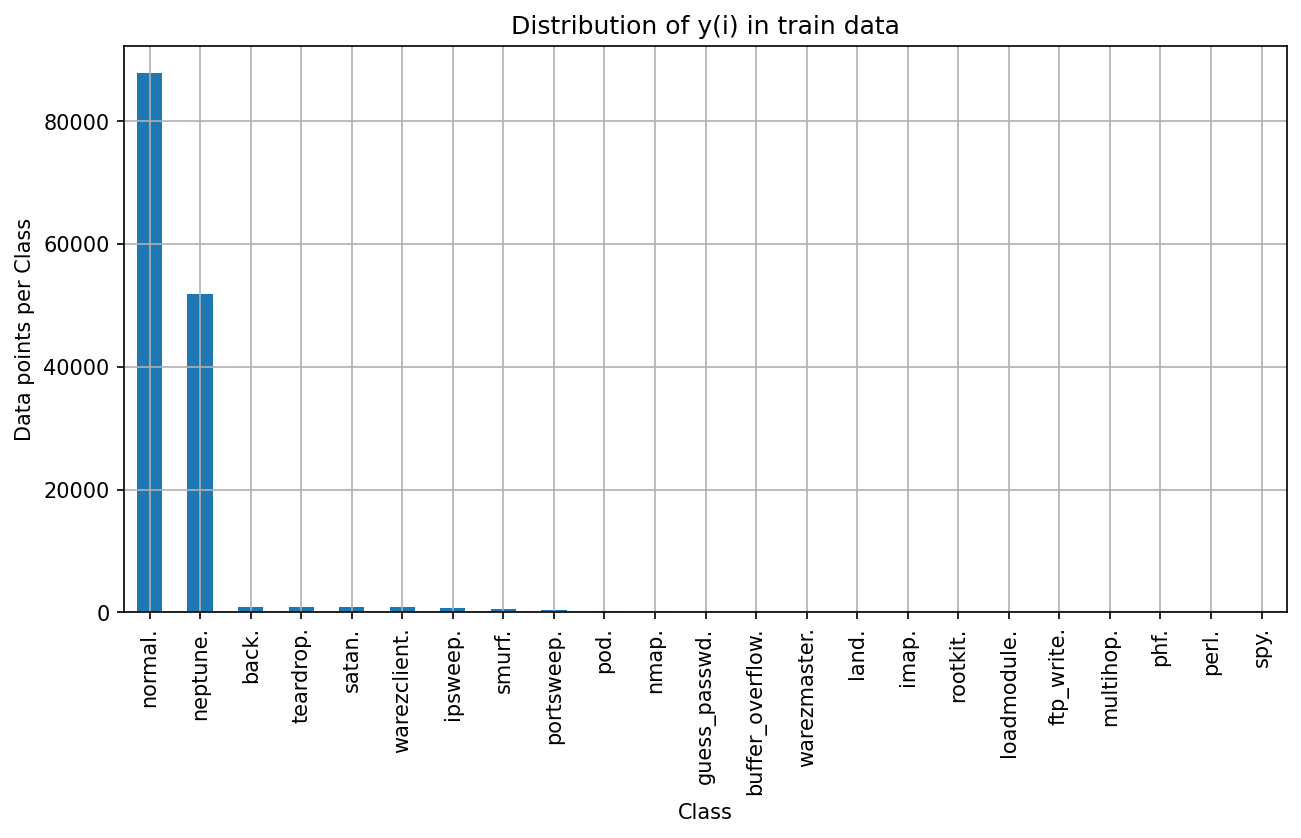

In [ ]:
# Visualizing the dataset's intrusion type variable

plt.figure(figsize=(10,5))
class_distribution = kdd_99_data['intrusion_type'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of y(i) in train data')
plt.grid()
plt.show()

In [ ]:
sorted_yaxis = np.argsort(-class_distribution.values)
for i in sorted_yaxis:
    print('Number of data points in class', i+1,':', class_distribution.values[i], '(', np.round((class_distribution.values[i]/kdd_99_data.shape[0]*100), 3), '%)')

Number of data points in class 1 : 87832 ( 60.33 %)
Number of data points in class 2 : 51820 ( 35.594 %)
Number of data points in class 3 : 968 ( 0.665 %)
Number of data points in class 4 : 918 ( 0.631 %)
Number of data points in class 5 : 906 ( 0.622 %)
Number of data points in class 6 : 893 ( 0.613 %)
Number of data points in class 7 : 651 ( 0.447 %)
Number of data points in class 8 : 641 ( 0.44 %)
Number of data points in class 9 : 416 ( 0.286 %)
Number of data points in class 10 : 206 ( 0.141 %)
Number of data points in class 11 : 158 ( 0.109 %)
Number of data points in class 12 : 53 ( 0.036 %)
Number of data points in class 13 : 30 ( 0.021 %)
Number of data points in class 14 : 20 ( 0.014 %)
Number of data points in class 15 : 19 ( 0.013 %)
Number of data points in class 16 : 12 ( 0.008 %)
Number of data points in class 17 : 10 ( 0.007 %)
Number of data points in class 18 : 9 ( 0.006 %)
Number of data points in class 19 : 8 ( 0.005 %)
Number of data points in class 20 : 7 ( 0.005 

Visualizing the data set, most of the data points have a normal connection which forms 60.33% of the total number of records. Connections that belong to abnormal connections, Neptune and back which forms 35.594% and 0.665% of the data points respectively have the highest number of data points. Furthermore, the categories for bad connection with the lowest data points are rootkit, load_module

In [ ]:
# Visualizing the dataset's for normal and abnormal traffic

kdd_99_normal = kdd_99_data[kdd_99_data['intrusion_type'] == "normal."]['intrusion_type'].count()
kdd_99_abnormal = kdd_99_data[kdd_99_data['intrusion_type'] != "normal."]['intrusion_type'].count()

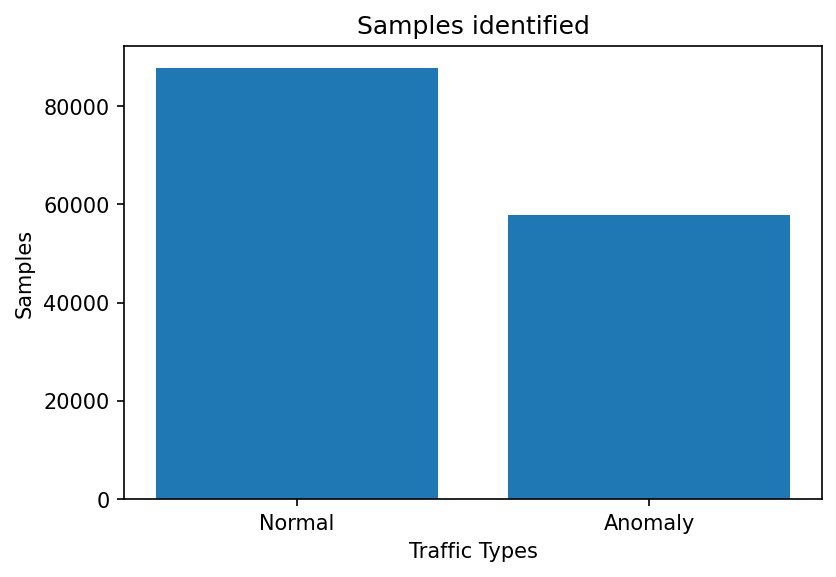

In [ ]:
kdd_99_label = ['Normal', 'Anomaly']
kdd_99_samples = [kdd_99_normal, kdd_99_abnormal]

default_dpi = mpl.rcParamsDefault['figure.dpi']
mpl.rcParams['figure.dpi'] = default_dpi * 1.5

# this is for plotting purpose
kdd_99_index = np.arange(len(kdd_99_label))
plt.bar(kdd_99_index, kdd_99_samples)
plt.xlabel('Traffic Types', fontsize=10)
plt.ylabel('Samples', fontsize=10)
plt.xticks(kdd_99_index, kdd_99_label, fontsize=10, rotation=0)
plt.title('Samples identified')
plt.show()

In [ ]:
print("Normal Traffic:", kdd_99_normal)
print("Abnormal Traffic:", kdd_99_abnormal)

print("% Normal", round((kdd_99_normal/len(kdd_99_data)*100), 1))
print("% Anomaly:", round((kdd_99_abnormal/len(kdd_99_data)*100), 1))

Normal Traffic: 87832
Abnormal Traffic: 57754
% Normal 60.3
% Anomaly: 39.7


Pairplots with seaborn

In [ ]:
def pairplot(data, label, features=[]):
  '''
  This function creates pairplot taking 4 features from our dataset as default parameters along with the output variable
  '''
  sns.pairplot(data, hue=label, height=4, diag_kind='hist',  vars=features, plot_kws={'alpha':0.6, 's':80, 'edgecolor':'k'})

  # Title 
  plt.suptitle('Pair Plot of Features vs Output variable', size = 28);

**Customization with PairGrid**

In contrast to the sns.pairplot function, sns.PairGrid is a class which means that it does not automatically fill in the plots for us. Instead, we create a class instance and then we map specific functions to the different sections of the grid. To create a PairGrid instance with our data, we use the following code which also limits the variables we will show

In [ ]:
'''
The real benefits of using the PairGrid class come when we want to create custom functions to map 
different information onto the plot. For example, we have added the Pearson Correlation 
Coefficient between two variables onto the scatterplot. 

To do so, we wrote a function that takes in two arrays, calculates the statistic, and then draws it on the graph. 
The following code shows how this is done (credit to this Stack Overflow answer):
'''
# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)


def pairgrid(data, label, features=[]):
  '''
  '''
  # Create an instance of the PairGrid class.
  grid = sns.PairGrid(data= data, vars = features, height = 4, dropna = True)

  '''
  If displayed this, we would get a blank graph because we have not mapped any functions to the grid sections. 
  There are three grid sections to fill in for a PairGrid: the upper triangle, lower triangle, and the diagonal. 
  To map plots to these sections, we use the grid.map method on the section. 
  For example, to map a scatter plot to the upper triangle we use:
  '''
  # Map a scatter plot to the upper triangle
  grid = grid.map_upper(plt.scatter, color = 'darkred')
  grid = grid.map_upper(corr)

  '''
  The map_upper method takes in any function that accepts two arrays of variables (such as plt.scatter)and 
  associated keywords (such as color). The map_lower method is the exact same but fills in the lower triangle of the grid. The map_diag is slightly different 
  because it takes in a function that accepts a single array (remember the diagonal shows only one variable). 
  An example is plt.hist which we use to fill in the diagonal section below:  
  '''

  # Map a histogram to the diagonal
  grid = grid.map_diag(plt.hist, bins = 10, color = 'darkred', edgecolor = 'k')
  # Map a density plot to the lower triangle
  grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')

  '''
  In this case, we are using a kernel density estimate in 2-D (a density plot) on the lower triangle. 
  Put together, this code gives us the plot we have below:
  '''

  # Title 
  plt.suptitle('Pair Grid of Features vs Output variable', size = 28)

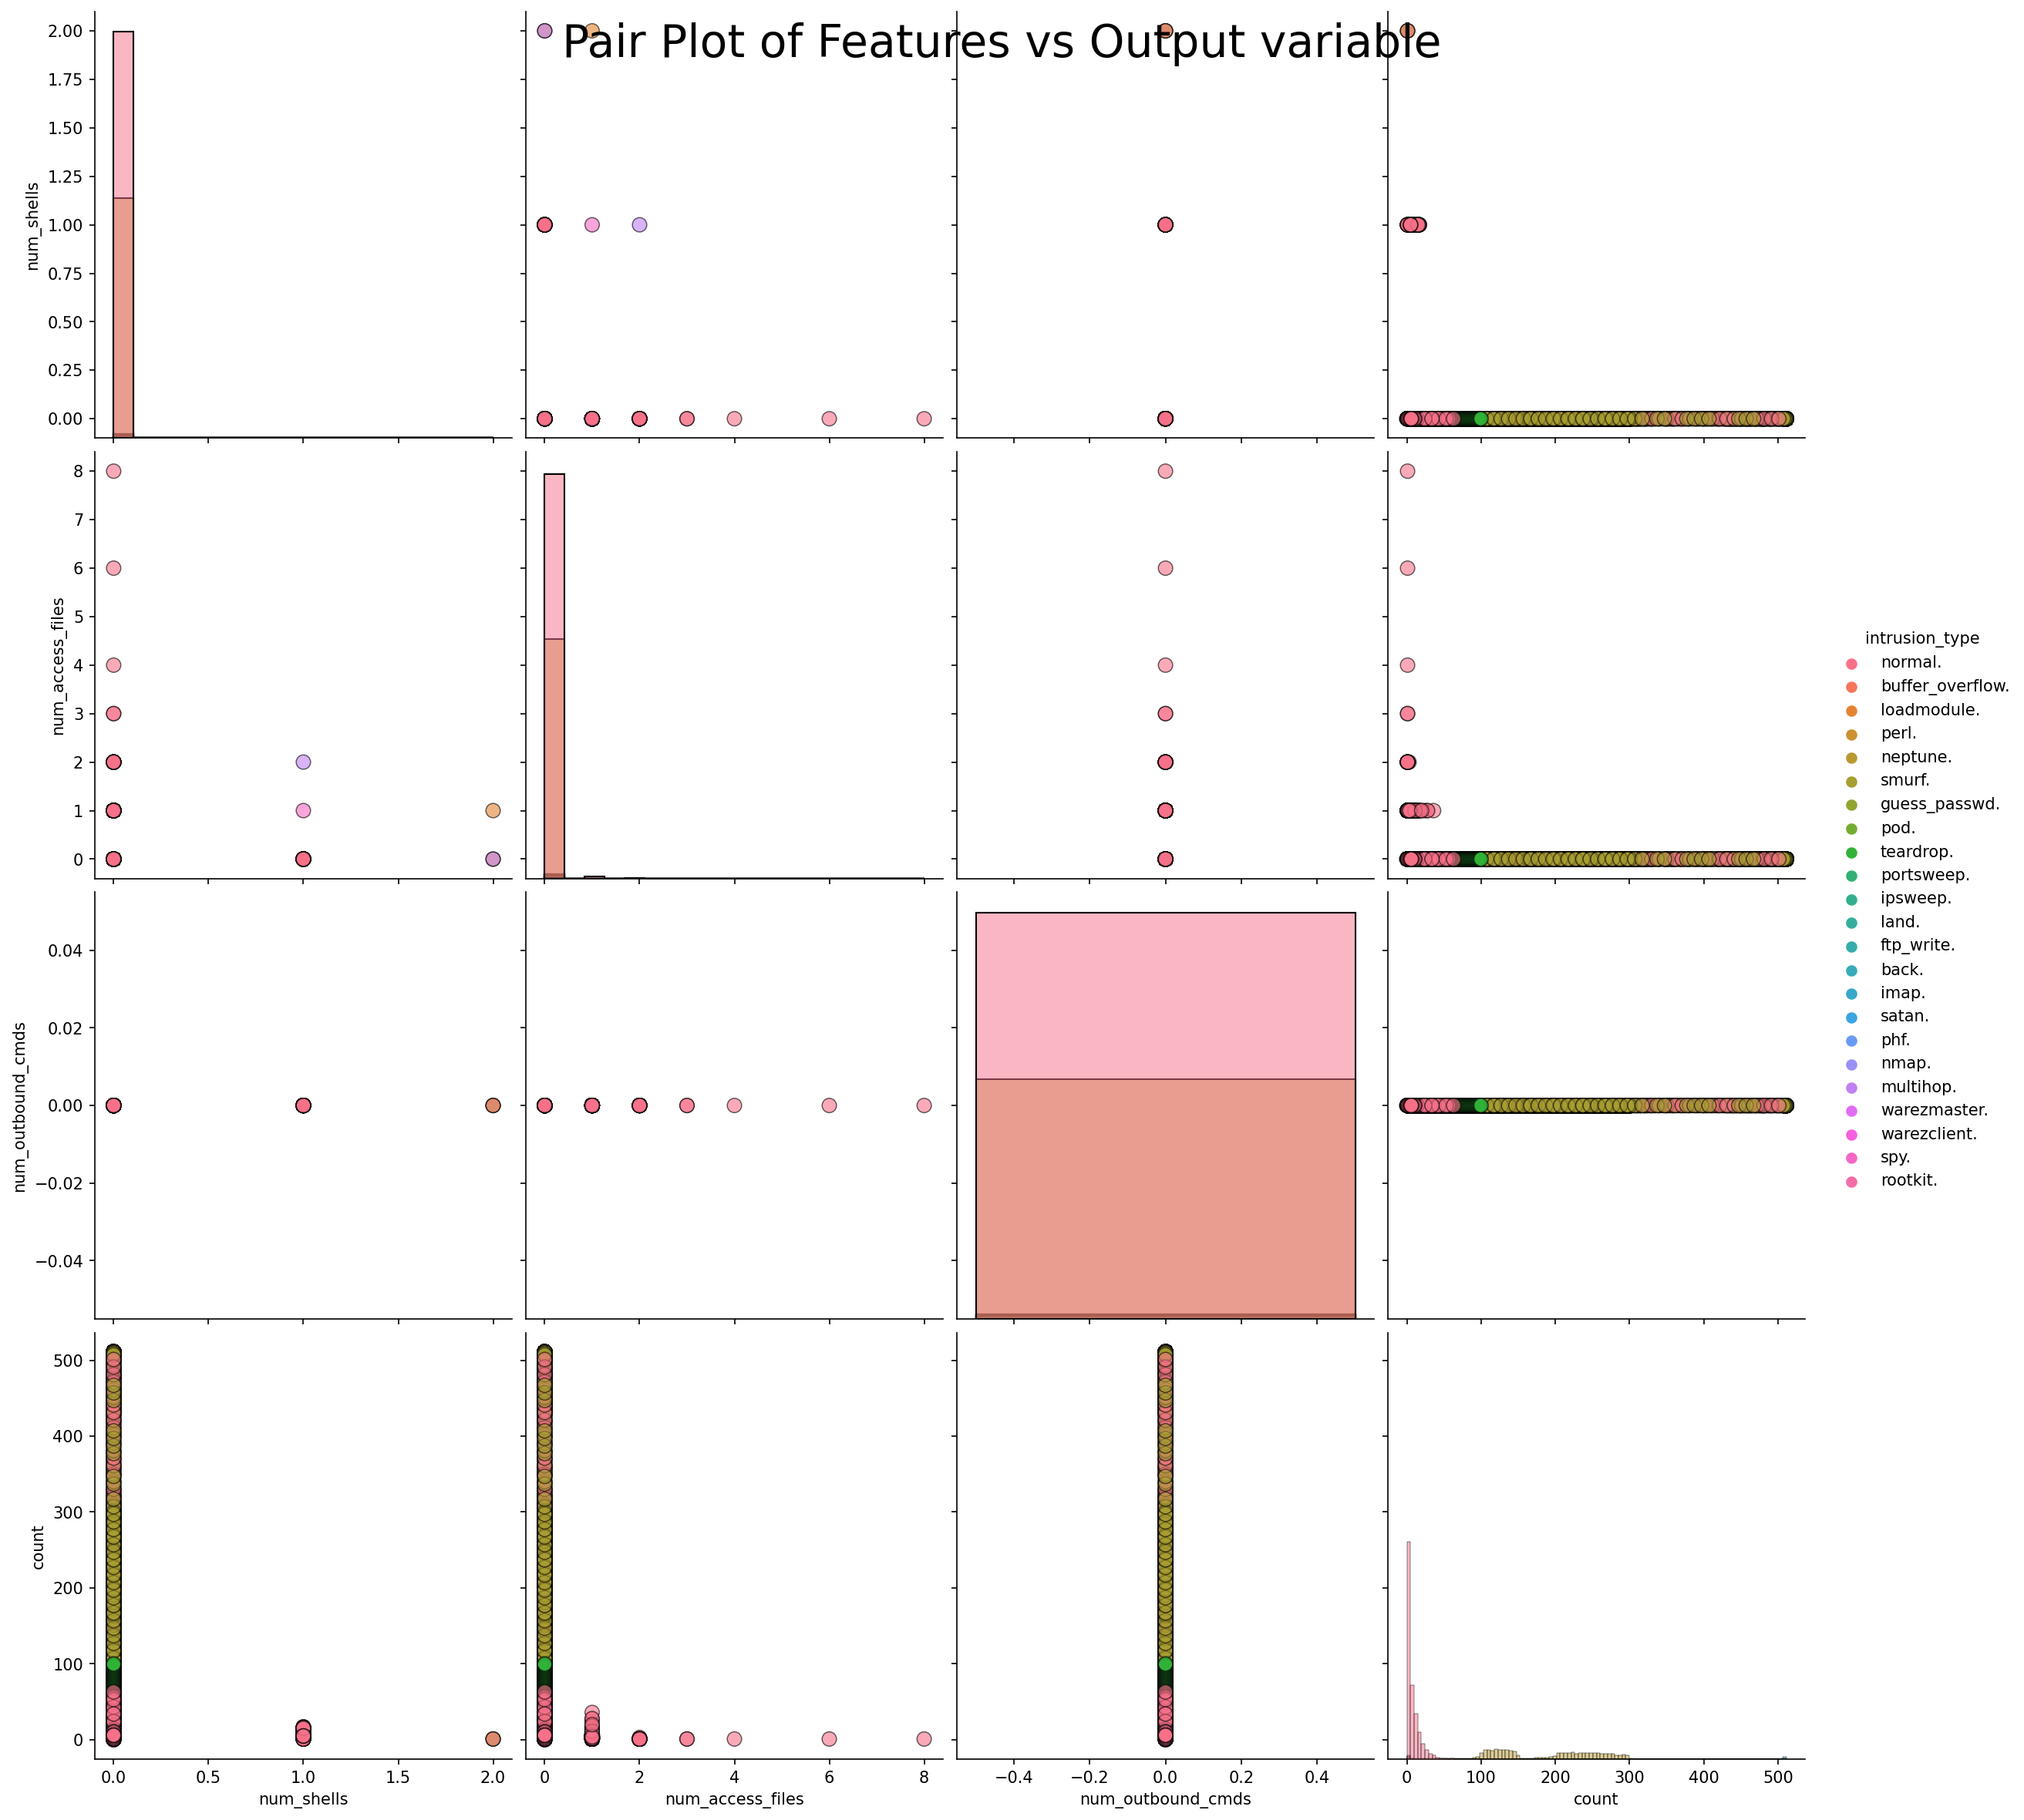

In [ ]:
pairplot(kdd_99_data, 'intrusion_type', features=['num_shells', 'num_access_files', 'num_outbound_cmds', 'count'])

In the display output for the pairplot of 'num_shells', 'num_access_files', 'num_outbound_cmds', 'count' against intrusion type, it is not clear if any of the variables are linearly separable (A dataset is said to be linearly separable if it is possible to draw a line that can separate the red and green points from each other. In n dimensions, the separator is a (n-1) dimensional hyperplane - although it is pretty much impossible to visualize for 4 or more dimensions.)

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1185: UserWarning: No co

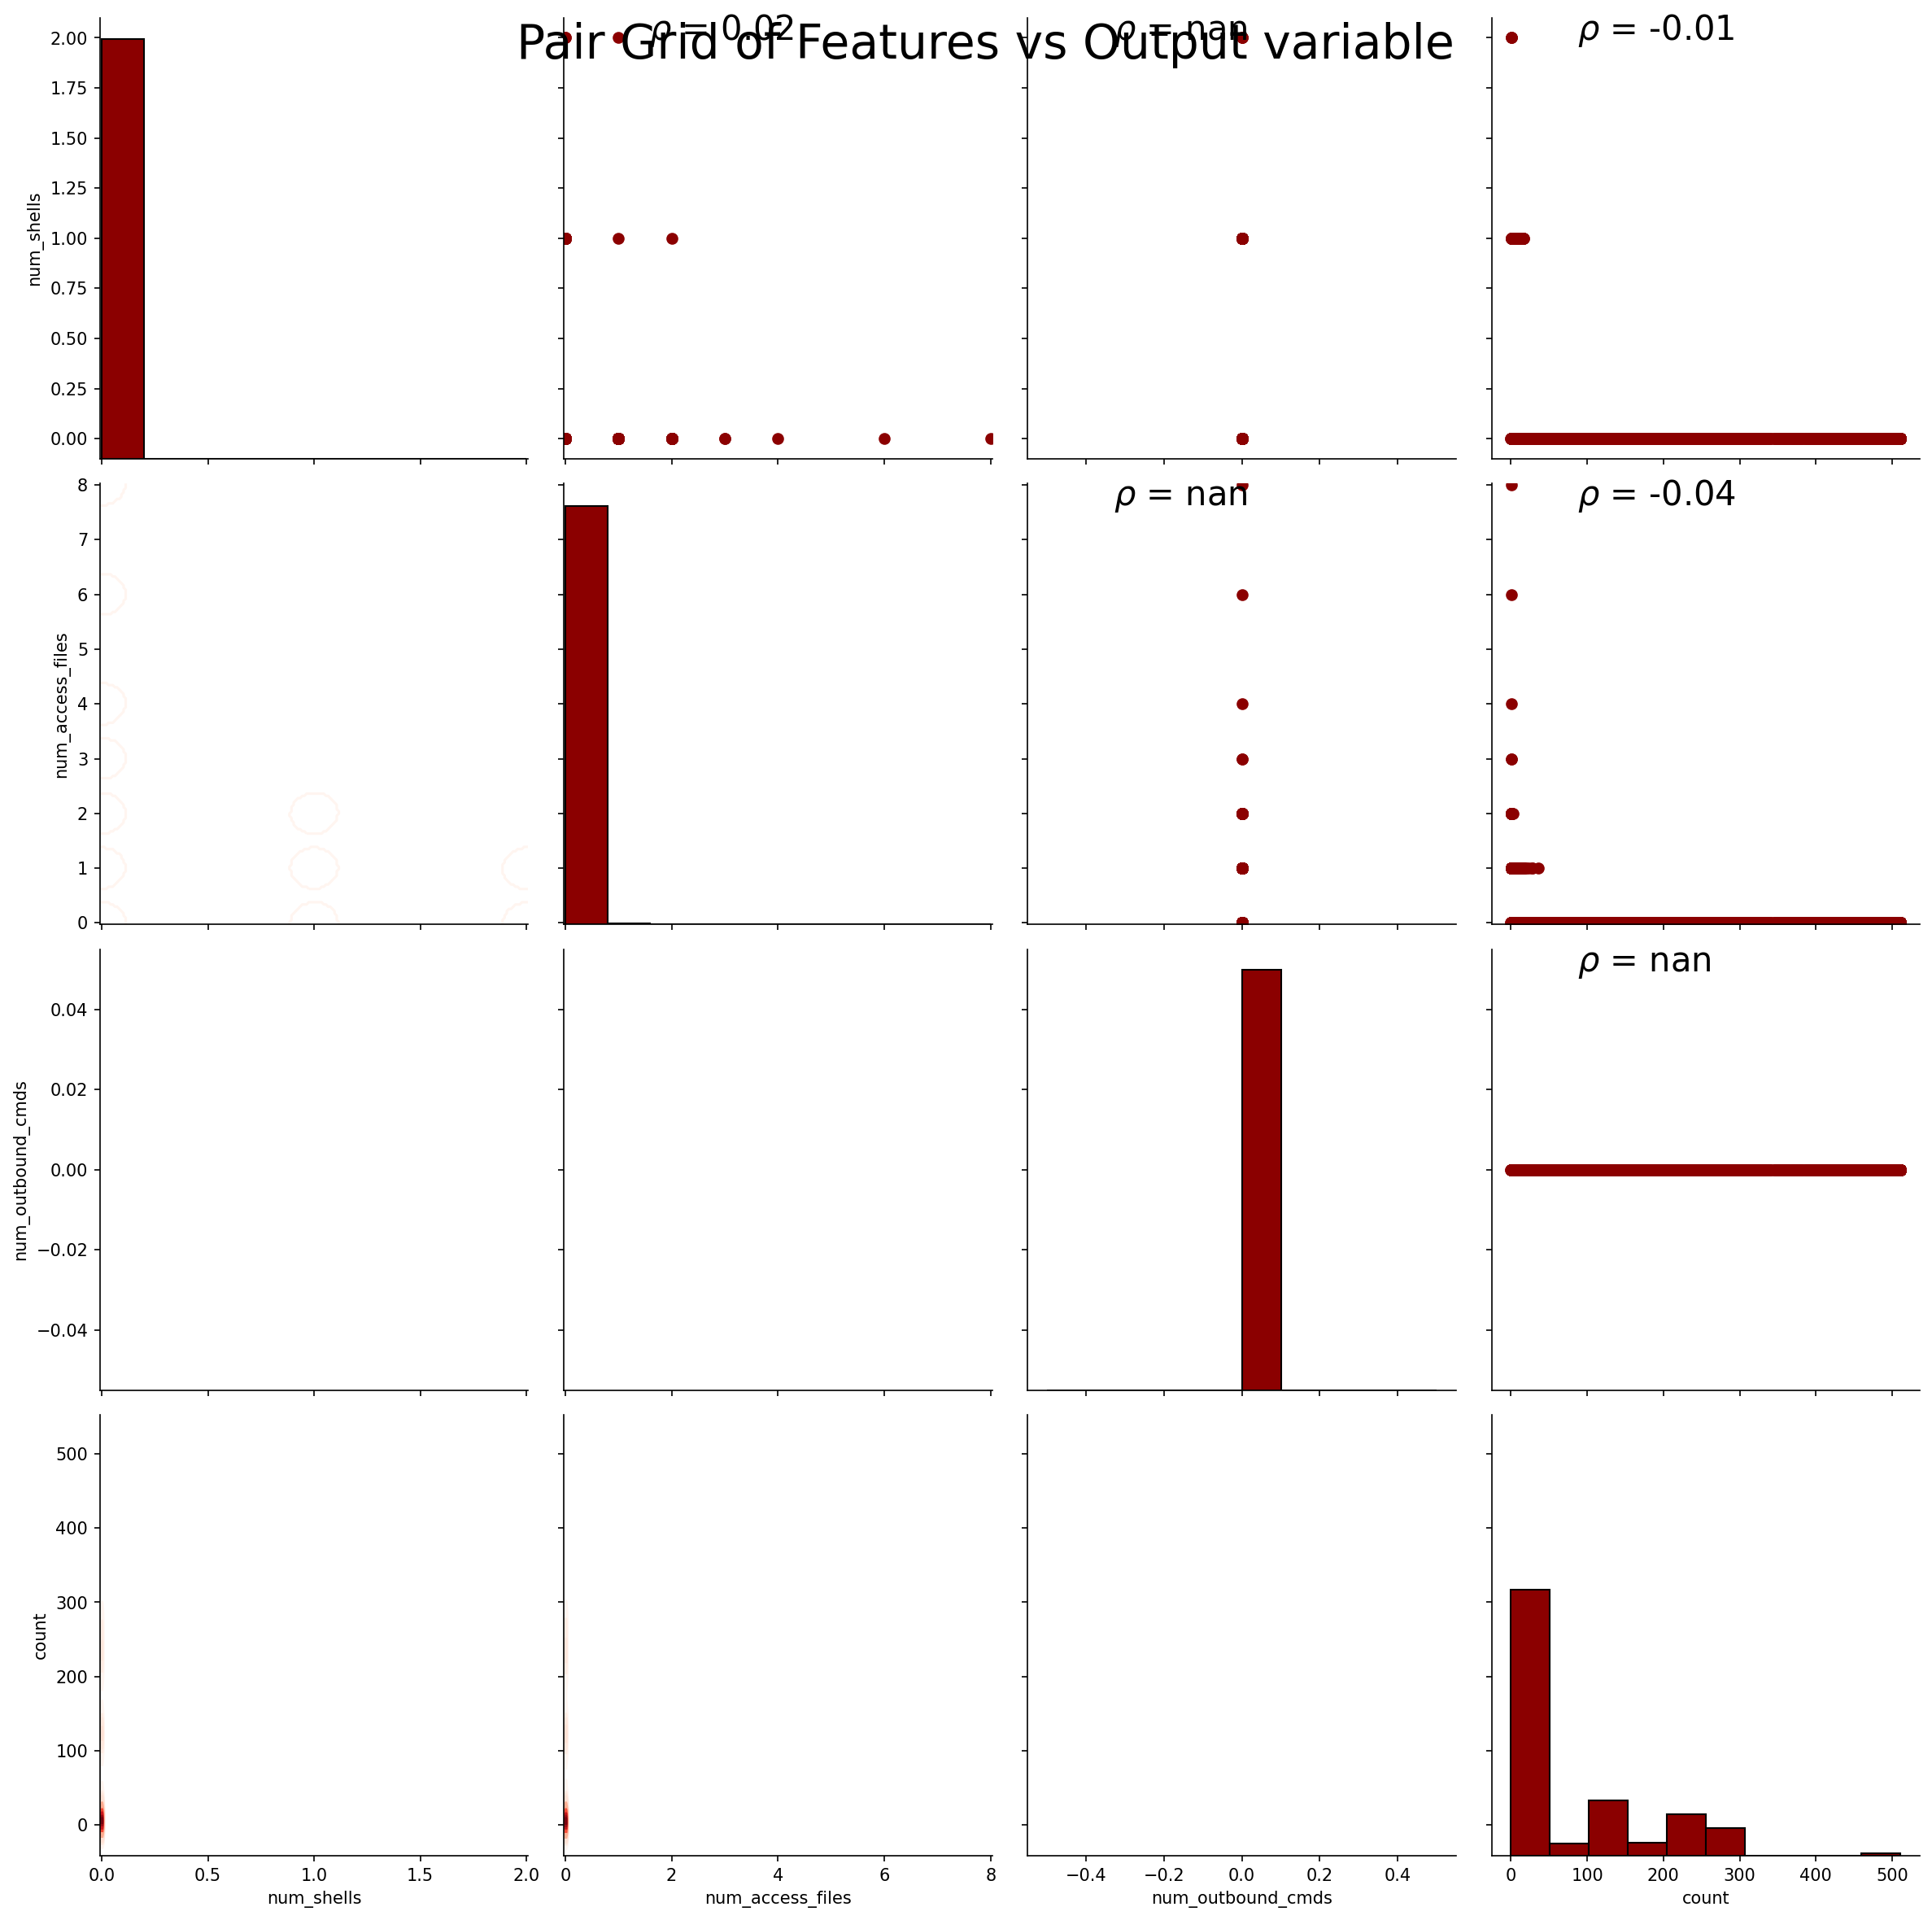

In [ ]:
pairgrid(kdd_99_data, 'intrusion_type', features=['num_shells', 'num_access_files', 'num_outbound_cmds', 'count'])

Although the pairplots show us a quick look into our dataset, it does not provide us customization that allows us to add more information to the plots. We have complimented the pairplots with pairgrid plots. With the pairgrid, we are able to add extra details concerning our dataset. In this case we were able to add the pearson correlation coefficient to the plots and on the lower and upper triangle of the output change the type of outputs to show different types of plots for better interpretation.

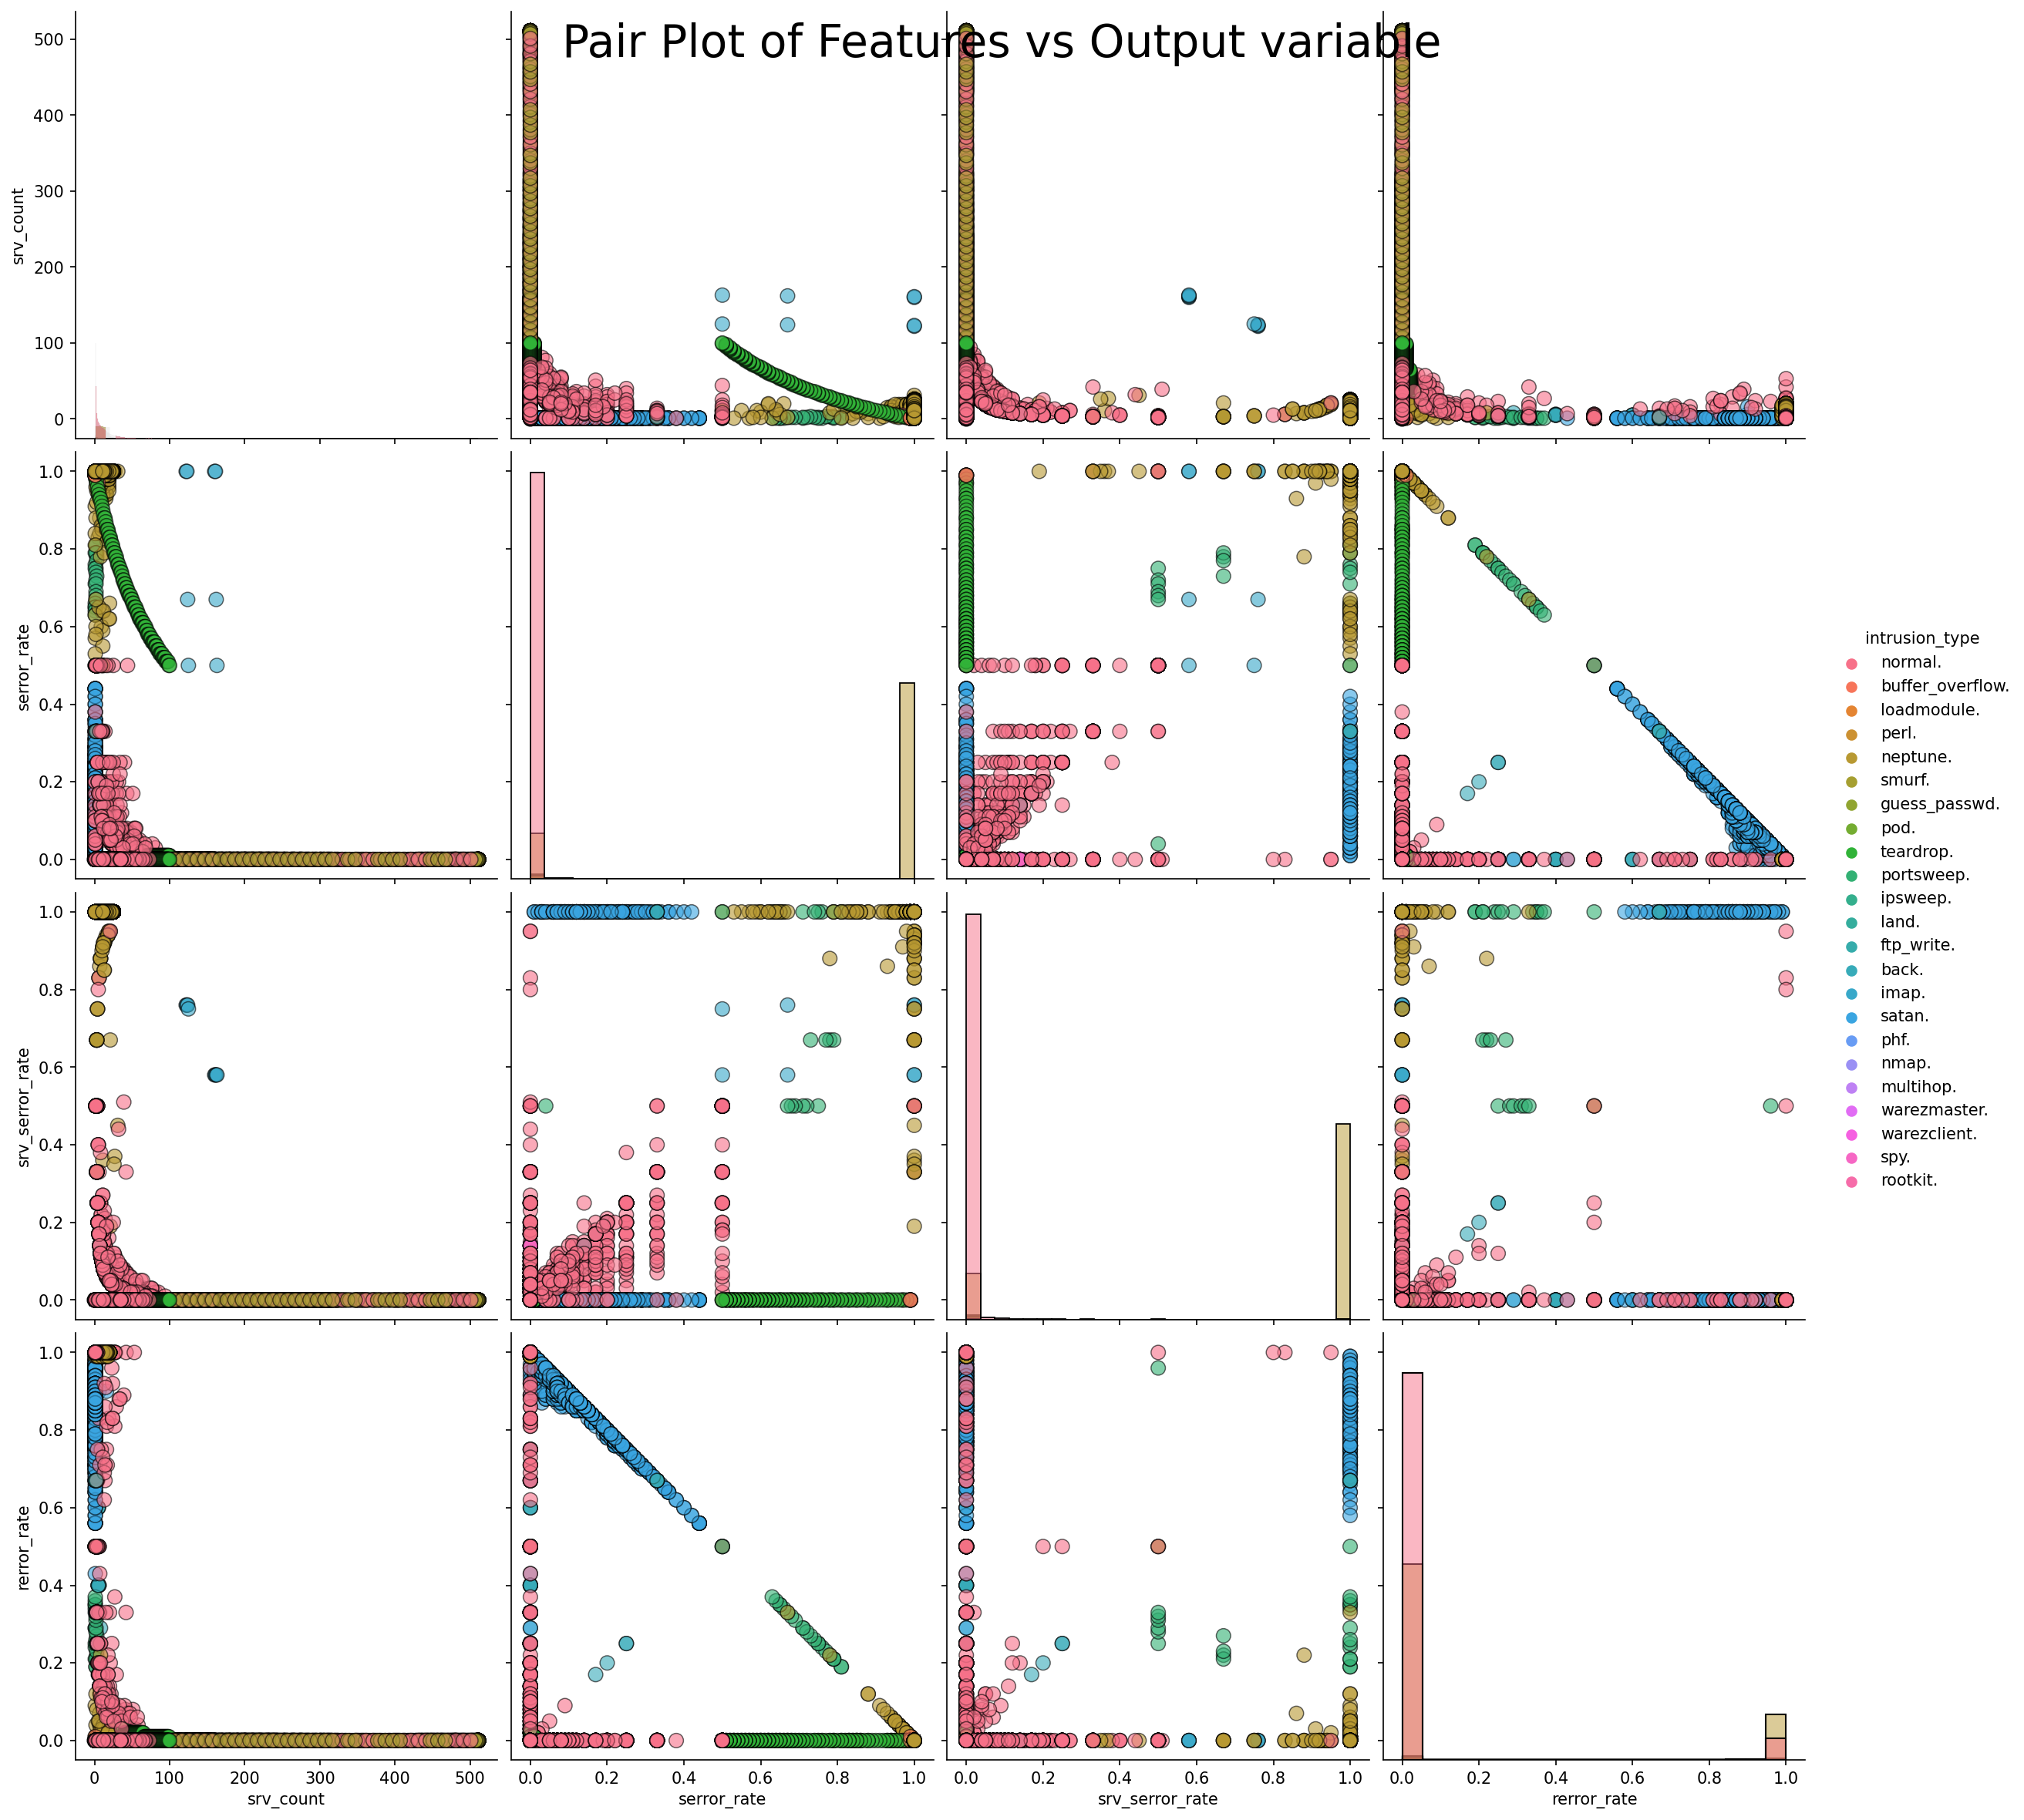

In [ ]:
pairplot(kdd_99_data, 'intrusion_type', features=['srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate'])

Furthermore, in the display output for the pairplot of 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate' against intrusion type, some of the variables are almost linearly separable (A dataset is said to be linearly separable if it is possible to draw a line that can separate the red and green points from each other. In n dimensions, the separator is a (n-1) dimensional hyperplane - although it is pretty much impossible to visualize for 4 or more dimensions.)

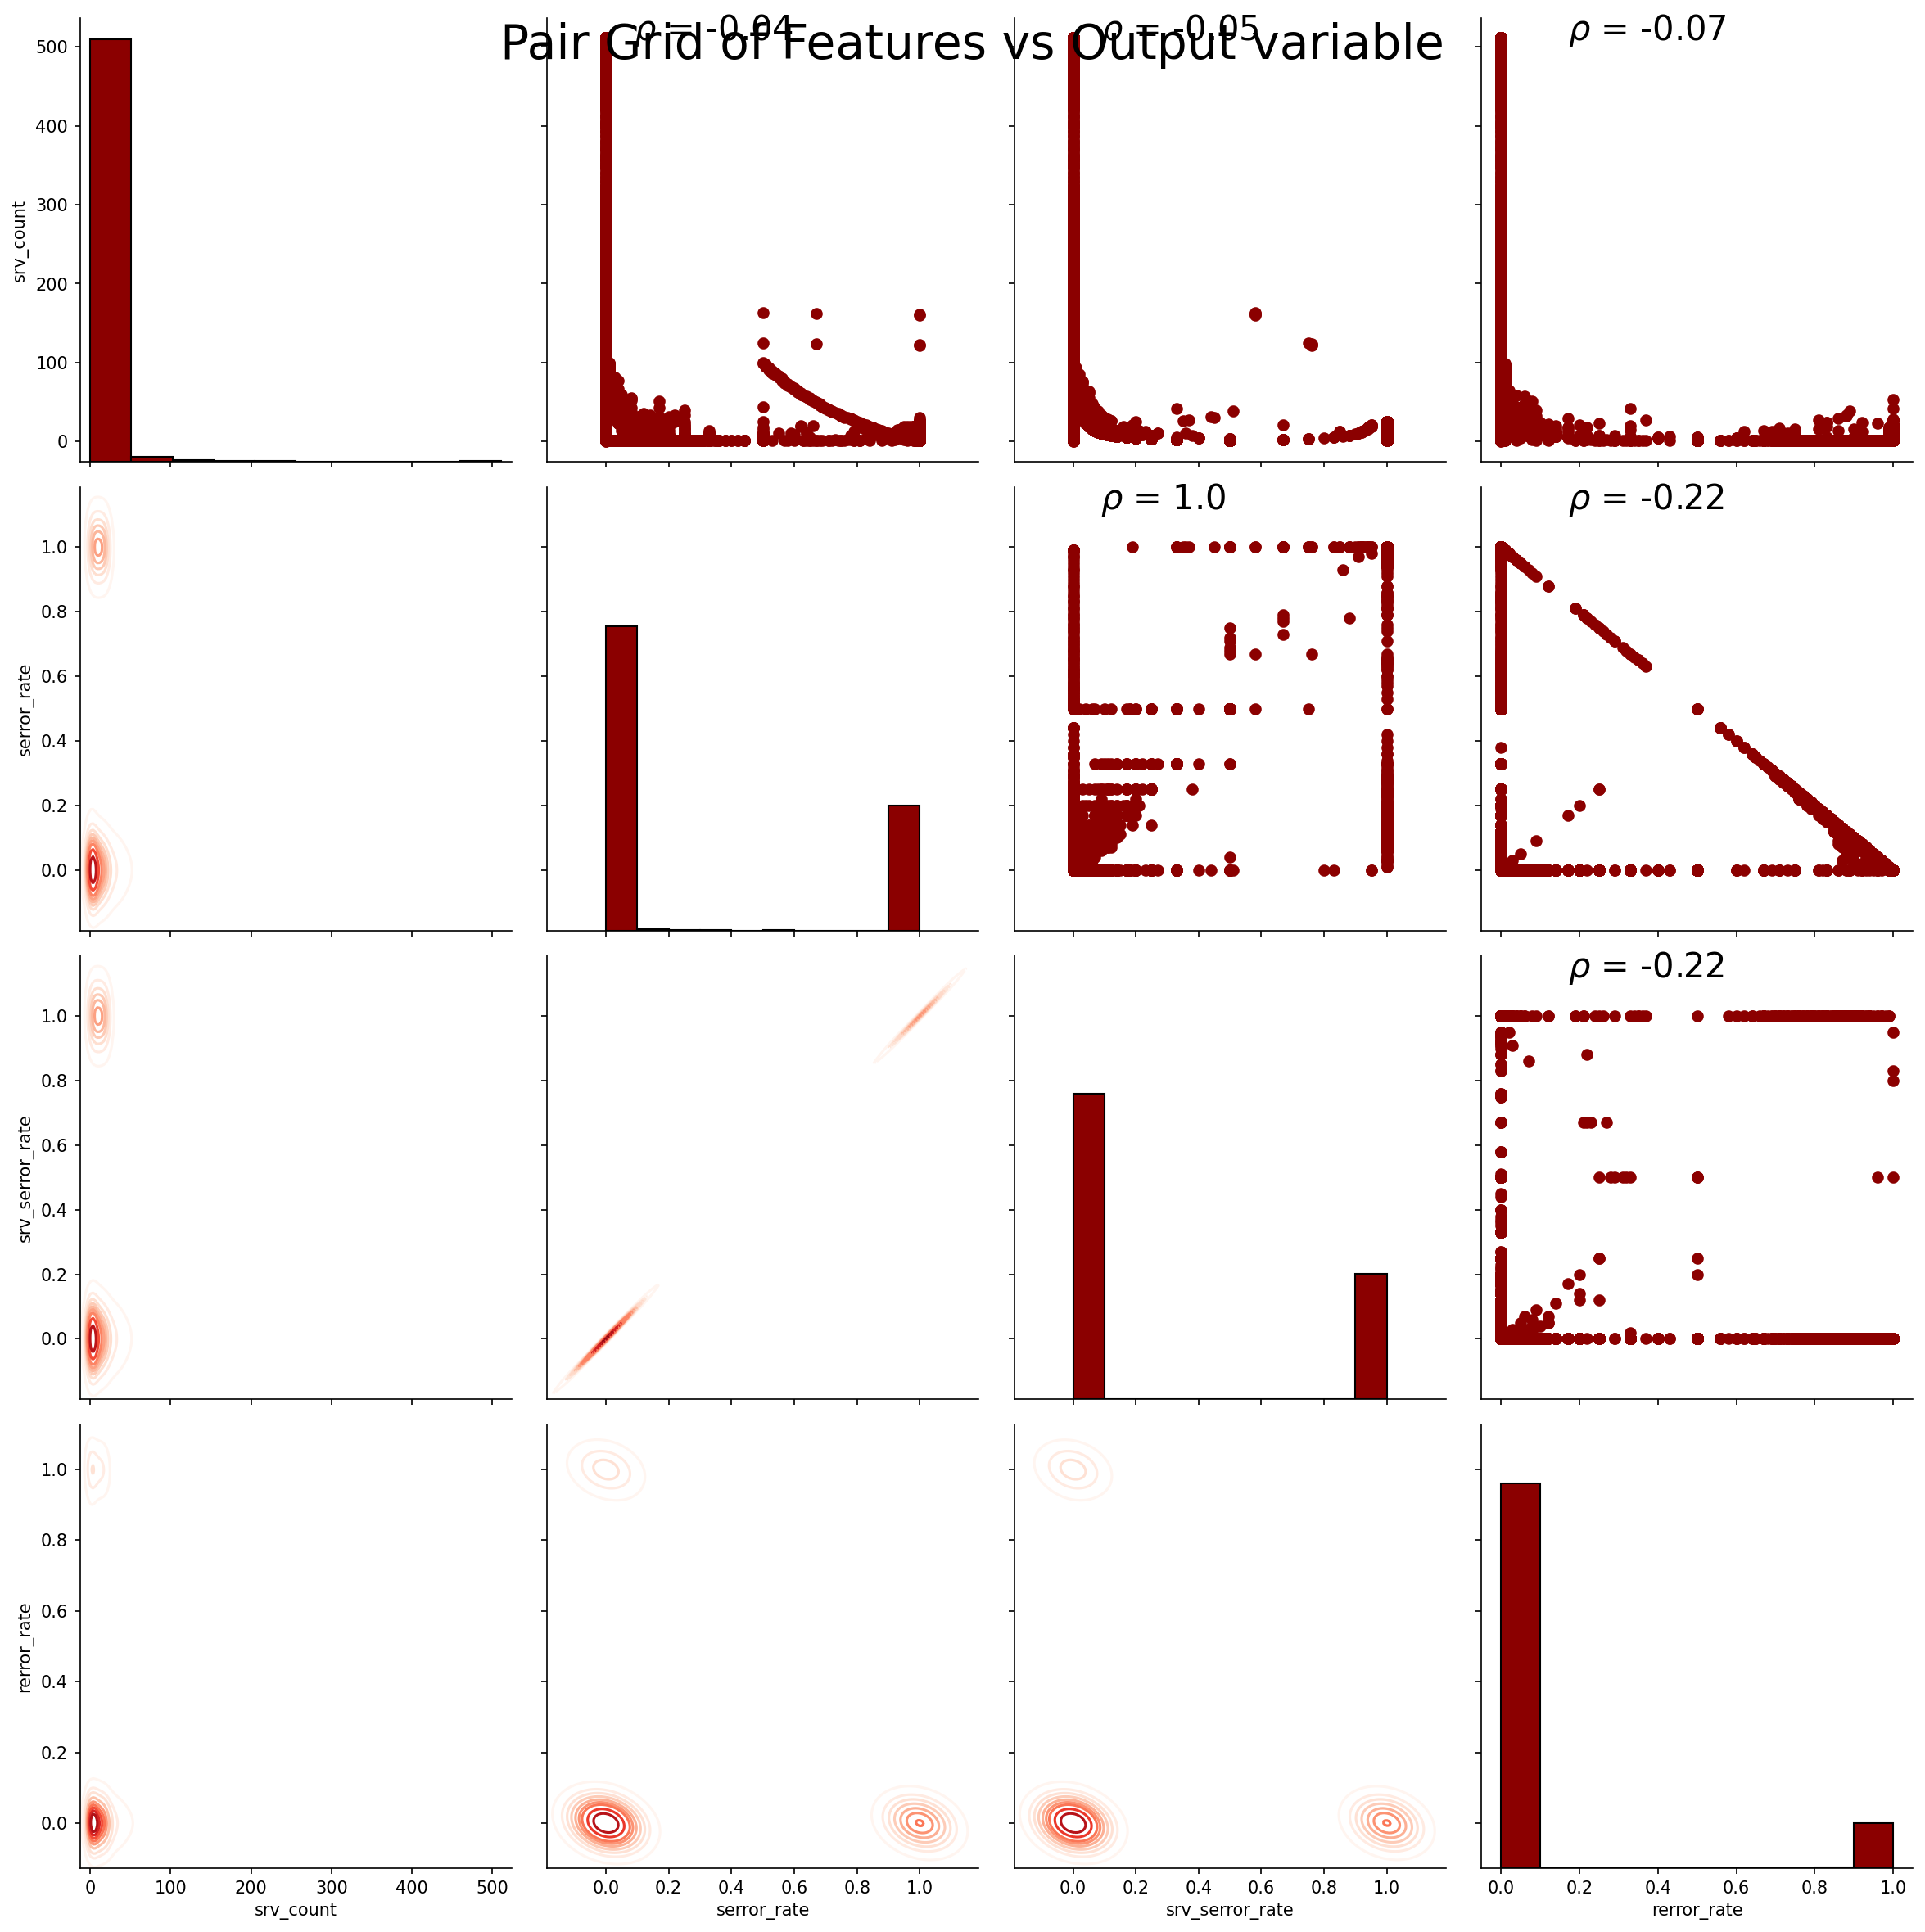

In [ ]:
pairgrid(kdd_99_data, 'intrusion_type', features=['srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate'])

According to the output for the pairgrids, we can observe that, from the pearson correlation coefficient, 

num_shells and num_access_files have a p value of 0.02 which indicates a very weak positive correlation, numb_shells and num_outbound_cmds shows nan indicating p value could not be computed for this pair, num_shells and count resulted to a p value of -0.01 indicating a ver weak negative correlation, num_access_files and num_outbound_cmds shows nan indicating the value of p could not be computed, num_access_file and count gave a p value of -0.04, num_bounds_cmds and count gave a nan result for p value indicating it could not be computed, serror_rate and srv_error_rate resulted to a p value of 1.0 indicating a very strong positive correlation, serror_rate and rerror_rate resulted to a p value of -0.22 indicating a weak negative relationship, and srv_serror_rate and rerror_rate gave a p value of -0.22 indicating a weak negative relationship.

From the above analysis, none of the pairs of variables show multicollinearity implying it is safe to admit all of them into the modeling stage.

Multicollinearity is not good if some variables showed strong relationship like srv_error_rate and serror_rate which in this case we shall admit only one of them in the modeling stage to avoid their combined effect giving false results. This is because they correlating strongly implies they may be measuring the same underlying construct.

High degree: If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation. Moderate degree: If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation. Low degree: When the value lies below + . 29, then it is said to be a small correlation.

# Train Test Split

**What is Overfitting/Underfitting a Model?**

As mentioned, in statistics and machine learning we usually split our data into two subsets: training data and testing data (and sometimes to three: train, validate and test), and fit our model on the train data, in order to make predictions on the test data. When we do that, one of two thing might happen: we overfit our model or we underfit our model. We don’t want any of these things to happen, because they affect the predictability of our model — we might be using a model that has lower accuracy and/or is ungeneralized (meaning you can’t generalize your predictions on other data). Let’s see what under and overfitting actually mean:

**Overfitting**

Overfitting means that model we trained has trained “too well” and is now, well, fit too closely to the training dataset. This usually happens when the model is too complex (i.e. too many features/variables compared to the number of observations). This model will be very accurate on the training data but will probably be very not accurate on untrained or new data. It is because this model is not generalized (or not AS generalized), meaning you can generalize the results and can’t make any inferences on other data, which is, ultimately, what you are trying to do. Basically, when this happens, the model learns or describes the “noise” in the training data instead of the actual relationships between variables in the data. This noise, obviously, isn’t part in of any new dataset, and cannot be applied to it.

**Underfitting**

In contrast to overfitting, when a model is underfitted, it means that the model does not fit the training data and therefore misses the trends in the data. It also means the model cannot be generalized to new data. As you probably guessed (or figured out!), this is usually the result of a very simple model (not enough predictors/independent variables). It could also happen when, for example, we fit a linear model (like linear regression) to data that is not linear. It almost goes without saying that this model will have poor predictive ability (on training data and can’t be generalized to other data).

It is worth noting the underfitting is not as prevalent as overfitting. Nevertheless, we want to avoid both of those problems in data analysis. You might say we are trying to find the middle ground between under and overfitting our model. As you will see, train/test split and cross validation help to avoid overfitting more than underfitting. Let’s dive into both of them!

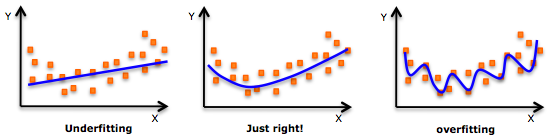

An example of overfitting, underfitting and a model that’s “just right!”


Train-Test Split Evaluation
The train-test split is a technique for evaluating the performance of a machine learning algorithm.

It can be used for classification or regression problems and can be used for any supervised learning algorithm.

The procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model and is referred to as the training dataset. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.

Train Dataset: Used to fit the machine learning model.
Test Dataset: Used to evaluate the fit machine learning model.
The objective is to estimate the performance of the machine learning model on new data: data not used to train the model.

This is how we expect to use the model in practice. Namely, to fit it on available data with known inputs and outputs, then make predictions on new examples in the future where we do not have the expected output or target values.

The train-test procedure is appropriate when there is a sufficiently large dataset available.

When to Use the Train-Test Split
The idea of “sufficiently large” is specific to each predictive modeling problem. It means that there is enough data to split the dataset into train and test datasets and each of the train and test datasets are suitable representations of the problem domain. This requires that the original dataset is also a suitable representation of the problem domain.

A suitable representation of the problem domain means that there are enough records to cover all common cases and most uncommon cases in the domain. This might mean combinations of input variables observed in practice. It might require thousands, hundreds of thousands, or millions of examples.

Conversely, the train-test procedure is not appropriate when the dataset available is small. The reason is that when the dataset is split into train and test sets, there will not be enough data in the training dataset for the model to learn an effective mapping of inputs to outputs. There will also not be enough data in the test set to effectively evaluate the model performance. The estimated performance could be overly optimistic (good) or overly pessimistic (bad).

If you have insufficient data, then a suitable alternate model evaluation procedure would be the k-fold cross-validation procedure.

In addition to dataset size, another reason to use the train-test split evaluation procedure is computational efficiency.

Some models are very costly to train, and in that case, repeated evaluation used in other procedures is intractable. An example might be deep neural network models. In this case, the train-test procedure is commonly used.

Alternately, a project may have an efficient model and a vast dataset, although may require an estimate of model performance quickly. Again, the train-test split procedure is approached in this situation.

Samples from the original training dataset are split into the two subsets using random selection. This is to ensure that the train and test datasets are representative of the original dataset.

How to Configure the Train-Test Split
The procedure has one main configuration parameter, which is the size of the train and test sets. This is most commonly expressed as a percentage between 0 and 1 for either the train or test datasets. For example, a training set with the size of 0.67 (67 percent) means that the remainder percentage 0.33 (33 percent) is assigned to the test set.

There is no optimal split percentage.

You must choose a split percentage that meets your project’s objectives with considerations that include:

Computational cost in training the model.
Computational cost in evaluating the model.
Training set representativeness.
Test set representativeness.
Nevertheless, common split percentages include:

Train: 80%, Test: 20%
Train: 67%, Test: 33%
Train: 50%, Test: 50%
Now that we are familiar with the train-test split model evaluation procedure, let’s look at how we can use this procedure in Python.

The scikit-learn Python machine learning library provides an implementation of the train-test split evaluation procedure via the train_test_split() function.

The function takes a loaded dataset as input and returns the dataset split into two subsets.

In [ ]:
# split a dataset into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(kdd_99_data.drop('intrusion_type', axis=1), kdd_99_data['intrusion_type'], stratify=kdd_99_data['intrusion_type'], test_size=0.20)
# create dataset
# X, y = make_blobs(n_samples=1000)
# split into train test sets
print("Shapes")
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

Shapes
(116468, 41) (29118, 41) (116468,) (29118,)


End of Train test split

# Data Preprocessing

Vectorization:

Vectorization is an important aspect of feature extraction in NLP. These techniques try to map every possible word to a specific integer. scikit-learn has DictVectorizer to convert text to a one-hot encoding form. The other API is the CountVectorizer, which converts the collection of text documents to a matrix of token counts. We could also use word2vec to convert text data to the vector form.

One-hot Encoding:

Consider that you have a vocabulary of size N. In the one-hot encoding technique, we map the words to the vectors of length n, where the nth digit is an indicator of the presence of the particular word. If you are converting words to the one-hot encoding format, then you will see vectors such as 0000…100, 0000…010, 0000…001, and so on. Every word in the vocabulary is represented by one of the combinations of a binary vector. The nth bit of each vector indicates the presence of the nth word in the vocabulary.

## Verifying data types

In [ ]:
x_train.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [ ]:
# Finding categorical features 
train_num_cols = x_train._get_numeric_data().columns 
  
train_cate_cols = list(set(x_train.columns)-set(train_num_cols)) 
# cate_cols.remove('target') 
# cate_cols.remove('Attack Type') 

In [ ]:
train_cate_cols

['service', 'flag', 'protocol_type']

In the above, we searched for highly correlated data in our new training data set to ensure 

In [ ]:
x_test.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [ ]:
# Finding categorical features 
test_num_cols = x_test._get_numeric_data().columns 
  
test_cate_cols = list(set(x_test.columns)-set(test_num_cols)) 
# cate_cols.remove('target') 
# cate_cols.remove('Attack Type') 

In [ ]:
test_cate_cols

['service', 'flag', 'protocol_type']

From the output below of the data types for the variable categories, it can be noticed that the variables protocol_type, service and flag are categorical and for this reason, there is need to convert this types to a standard from suitable for the analysis and modeling. This process in Machine learning is called vectorization and in Python programming we use one-hot encoding.

### Feature Mapping and One-hot enconding of categorical variables in our dataset

Encoding the Protocal Variable

In [ ]:
t1protocol = list(x_train['protocol_type'].values)
t1protocol = list(set(t1protocol))
print('Protocol types are:', t1protocol)

Protocol types are: ['udp', 'tcp', 'icmp']


In [ ]:
t2protocol = list(x_test['protocol_type'].values)
t2protocol = list(set(t2protocol))
print('Protocol types are:', t2protocol)

Protocol types are: ['udp', 'tcp', 'icmp']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
one_hot = CountVectorizer(vocabulary=t1protocol, binary=True)

train_protocol = one_hot.fit_transform(x_train['protocol_type'].values)
test_protocol = one_hot.transform(x_test['protocol_type'].values)

print(train_protocol[1].toarray())
print(train_protocol.shape)

[[0 1 0]]
(116468, 3)


Encoding Service Variable

In [ ]:
t1service = list(x_train['service'].values)
t1service = list(set(t1service))
print('Service types are:', t1service)

Service types are: ['urh_i', 'X11', 'red_i', 'echo', 'ftp', 'netbios_ssn', 'exec', 'hostnames', 'private', 'ldap', 'rje', 'ecr_i', 'eco_i', 'kshell', 'login', 'urp_i', 'daytime', 'tim_i', 'sql_net', 'sunrpc', 'discard', 'klogin', 'iso_tsap', 'uucp_path', 'efs', 'ftp_data', 'vmnet', 'mtp', 'bgp', 'imap4', 'Z39_50', 'smtp', 'auth', 'remote_job', 'printer', 'netbios_dgm', 'domain_u', 'http', 'domain', 'courier', 'uucp', 'nntp', 'ssh', 'tftp_u', 'ctf', 'http_443', 'finger', 'time', 'netstat', 'ntp_u', 'link', 'whois', 'nnsp', 'name', 'shell', 'telnet', 'supdup', 'pop_2', 'netbios_ns', 'systat', 'pop_3', 'IRC', 'other', 'csnet_ns', 'gopher']


In [ ]:
t2service = list(x_test['service'].values)
t2service = list(set(t2service))
print('Service types are:', t2service)

Service types are: ['urh_i', 'X11', 'echo', 'ftp', 'hostnames', 'netbios_ssn', 'exec', 'IRC', 'private', 'ldap', 'rje', 'ecr_i', 'eco_i', 'kshell', 'login', 'urp_i', 'daytime', 'sql_net', 'sunrpc', 'discard', 'klogin', 'iso_tsap', 'uucp_path', 'efs', 'ftp_data', 'vmnet', 'mtp', 'bgp', 'imap4', 'Z39_50', 'smtp', 'auth', 'remote_job', 'printer', 'netbios_dgm', 'domain_u', 'http', 'uucp', 'domain', 'courier', 'nntp', 'ssh', 'ctf', 'http_443', 'finger', 'time', 'netstat', 'ntp_u', 'link', 'whois', 'nnsp', 'name', 'shell', 'telnet', 'supdup', 'pop_2', 'netbios_ns', 'systat', 'pop_3', 'pm_dump', 'other', 'csnet_ns', 'gopher']


In [ ]:
one_hot_service = CountVectorizer(vocabulary=t1service, binary=True)

train_service = one_hot_service.fit_transform(x_train['service'].values)
test_service = one_hot_service.transform(x_test['service'].values)

print(train_service[1].toarray())
print(train_service.shape)

[[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
(116468, 65)


Encoding Flag Variable

In [ ]:
t1flag = list(x_train['flag'].values)
t1flag = list(set(t1flag))
print('Flag types are:', t1flag)

Flag types are: ['S3', 'S1', 'S2', 'RSTOS0', 'REJ', 'SF', 'RSTO', 'RSTR', 'OTH', 'S0', 'SH']


In [ ]:
t2flag = list(x_test['flag'].values)
t2flag = list(set(t2flag))
print('Flag types are:', t2flag)

Flag types are: ['S3', 'S1', 'S2', 'RSTOS0', 'REJ', 'SF', 'RSTO', 'RSTR', 'OTH', 'S0', 'SH']


In [ ]:
one_hot_flag = CountVectorizer(vocabulary=t1flag, binary=True)

train_flag = one_hot_flag.fit_transform(x_train['flag'].values)
test_flag = one_hot_flag.transform(x_test['flag'].values)

print(train_flag[1].toarray())
print(train_flag.shape)

[[0 0 0 0 0 0 0 0 0 0 0]]
(116468, 11)


### Data Scaling or Standardization

Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization or standardization and is generally performed during the data preprocessing step.

Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

Here’s the formula for normalization:

Normalization equation
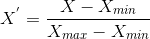
Here, Xmax and Xmin are the maximum and the minimum values of the feature respectively.

When the value of X is the minimum value in the column, the numerator will be 0, and hence X’ is 0
On the other hand, when the value of X is the maximum value in the column, the numerator is equal to the denominator and thus the value of X’ is 1
If the value of X is between the minimum and the maximum value, then the value of X’ is between 0 and 1


Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

Here’s the formula for standardization:

Standardization equation
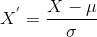

Feature scaling: Mu is the mean of the feature values and Feature scaling: Sigma is the standard deviation of the feature values. Note that in this case, the values are not restricted to a particular range.

Now, the big question in your mind must be when should we use normalization and when should we use standardization? Let’s find out!



Why is scaling important?
Feature scaling is essential for machine learning algorithms that calculate distances between data. ... For example, the majority of classifiers calculate the distance between two points by the distance. If one of the features has a broad range of values, the distance governs this particular feature.

Normalization vs. standardization is an eternal question among machine learning newcomers. Let me elaborate on the answer in this section.

Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.
Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.

StandardScaler follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance.
MinMaxScaler scales all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset. This scaling compresses all the inliers in the narrow range [0, 0.005].
In the presence of outliers, StandardScaler does not guarantee balanced feature scales, due to the influence of the outliers while computing the empirical mean and standard deviation. This leads to the shrinkage in the range of the feature values.

By using RobustScaler(), we can remove the outliers and then use either StandardScaler or MinMaxScaler for preprocessing the dataset.

It scales features using statistics that are robust to outliers. This method removes the median and scales the data in the range between 1st quartile and 3rd quartile. i.e., in between 25th quantile and 75th quantile range. This range is also called an Interquartile range.

The median and the interquartile range are then stored so that it could be used upon future data using the transform method. If outliers are present in the dataset, then the median and the interquartile range provide better results and outperform the sample mean and variance.

RobustScaler uses the interquartile range so that it is robust to outliers. Therefore its formula is as follows:



 \dfrac{x_i - Q_1(x)}{Q_3(x) - Q_1(x)} 




In [ ]:

test_distribution = kdd_99_features[-5:]

In [ ]:
x_train['duration'].values

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn import preprocessing
from scipy.sparse import hstack

In [ ]:
# test_kdd_99_data = kdd_99_data.drop(['protocol_type', 'service', 'flag', 'intrusion_type'], axis=1)
# df1 = df[['a','d']]
test_kdd_99_data = kdd_99_data[['num_access_files', 'src_bytes']] #drop(['protocol_type', 'service', 'flag', 'intrusion_type'], axis=1)


In [ ]:
def test_scalers(x_train, feature):
  rscaler = preprocessing.RobustScaler() 
  robust_df = rscaler.fit_transform(x_train) 
  robust_df = pd.DataFrame(robust_df, columns =[feature, 'src_bytes']) 
  
  sscaler = preprocessing.StandardScaler() 
  standard_df = sscaler.fit_transform(x_train) 
  standard_df = pd.DataFrame(standard_df, columns =[feature, 'src_bytes']) 
  
  mscaler = preprocessing.MinMaxScaler() 
  minmax_df = mscaler.fit_transform(x_train) 
  minmax_df = pd.DataFrame(minmax_df, columns =[feature, 'src_bytes']) 
  
  fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5)) 
  ax1.set_title('Before Scaling') 
  
  sns.kdeplot(x_train[feature], ax = ax1, color ='r') 
  sns.kdeplot(x_train['src_bytes'], ax = ax1, color ='b') 
  ax2.set_title('After Robust Scaling') 
  
  sns.kdeplot(robust_df[feature], ax = ax2, color ='red') 
  sns.kdeplot(robust_df['src_bytes'], ax = ax2, color ='blue') 
  ax3.set_title('After Standard Scaling') 
  
  sns.kdeplot(standard_df[feature], ax = ax3, color ='black') 
  sns.kdeplot(standard_df['src_bytes'], ax = ax3, color ='g') 
  ax4.set_title('After Min-Max Scaling') 
  
  sns.kdeplot(minmax_df[feature], ax = ax4, color ='black') 
  sns.kdeplot(minmax_df['src_bytes'], ax = ax4, color ='g') 
  plt.show() 

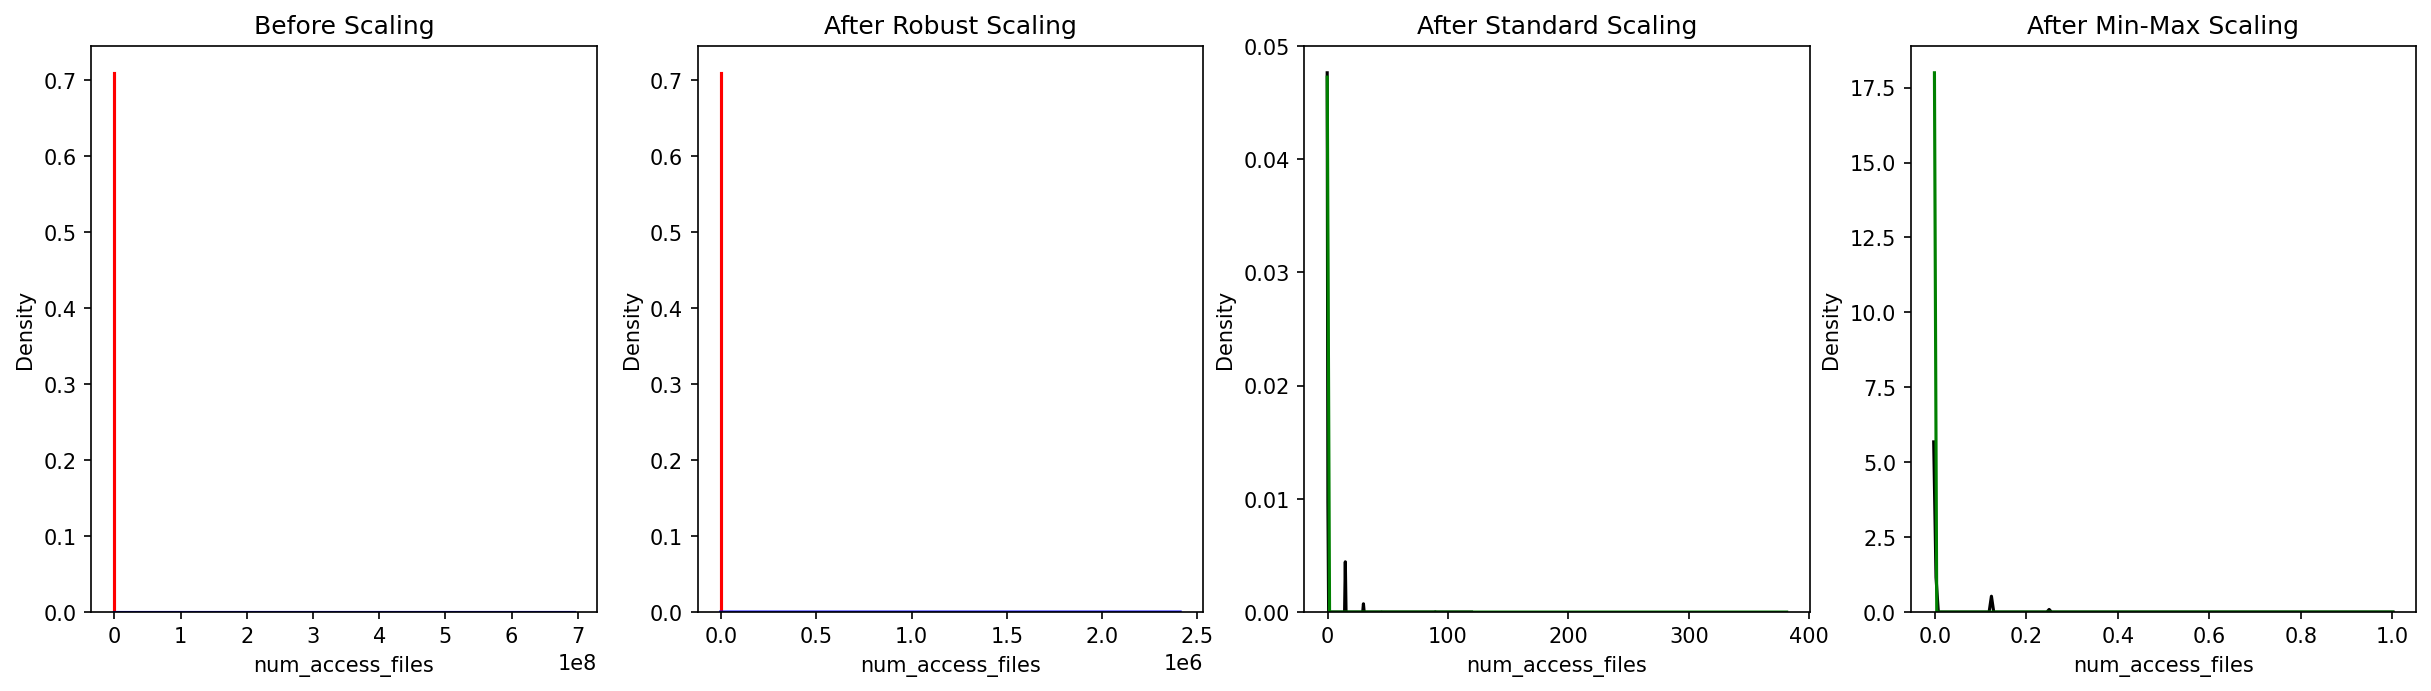

In [ ]:
test_scalers(test_kdd_99_data, 'num_access_files')

By using RobustScaler(), we can remove the outliers and then use either StandardScaler or MinMaxScaler for preprocessing the dataset.

How RobustScaler works:
class
sklearn.preprocessing.RobustScaler(
with_centering=True,
with_scaling=True,
quantile_range=(25.0, 75.0),
copy=True,
)

It scales features using statistics that are robust to outliers. This method removes the median and scales the data in the range between 1st quartile and 3rd quartile. i.e., in between 25th quantile and 75th quantile range. This range is also called an Interquartile range.

The median and the interquartile range are then stored so that it could be used upon future data using the transform method. If outliers are present in the dataset, then the median and the interquartile range provide better results and outperform the sample mean and variance.

RobustScaler uses the interquartile range so that it is robust to outliers. Therefore its formula is as follows:



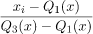 

In [ ]:
from sklearn import preprocessing
from scipy.sparse import hstack

def feature_scaling(x_train, x_test, scaler):
 
 '''
 This function performs standardisation on the features
 '''
#  scaler = StandardScaler()
#  robust_scaler = preprocessing.RobustScaler()

 scaler1 = scaler.fit_transform(x_train.values.reshape(-1,1))
 scaler2 = scaler.transform(x_test.values.reshape(-1,1))
 
 return scaler1, scaler2

In [ ]:

# def feature_merge(to_scale_train, to_scale_test, feature):
  # scaled_train, scaled_test = feature_scaling(to_scale, to_scale_test, feature)

kdd_99_features = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted',
'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count',
'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 
                   'intrusion_type']

In [ ]:
kdd_99_features

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'intrusion_type']

In [ ]:
kdd_99_features_toscale = kdd_99_features.copy()

kdd_99_features_toscale.remove('protocol_type')
kdd_99_features_toscale.remove('service')
kdd_99_features_toscale.remove('flag')
kdd_99_features_toscale.remove('intrusion_type')
kdd_99_features_toscale.remove('duration')

In [ ]:
kdd_99_features_toscale

['src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [ ]:
len(kdd_99_features_toscale)

37

In [ ]:
# Create different scaler types

scaler1 = preprocessing.RobustScaler()
scaler2 = preprocessing.StandardScaler()
scaler3 = preprocessing.MinMaxScaler()

### Scaling and mergin the features for modeling

In [ ]:
# Scale duration first to maintain order of the frames
# Stack the scaled features so far horizontally

scaled = feature_scaling(x_train['duration'], x_test['duration'], scaler2)

duration_train = scaled[0]
duration_test = scaled[1]

In [ ]:
x_train_1 = hstack((duration_train, train_protocol, train_service, train_flag))
x_test_1 = hstack((duration_test, test_protocol, test_service, test_flag))

In [ ]:
sum(kdd_99_data['num_outbound_cmds'].values) == 0

True

In [ ]:
scaled_train = ()
scaled_test = ()

# Evaluating performance of each scaler type before performing actual scaling

for feature in kdd_99_features_toscale:
  
  # Do not include a feature if all its values are zeros
  if sum(kdd_99_data[feature].values) != 0:    
    scaled = feature_scaling(x_train[feature], x_test[feature], scaler2)

    if feature == 'land' or feature == 'logged_in' or feature == 'is_host_login' or feature == 'is_guest_login':
      print(feature)
      x_train_1 = hstack((x_train_1, scaled[0]))
      x_test_1 = hstack((x_test_1, scaled[1]))
    else:
      x_train_1 = hstack((x_train_1, scaled[0]))
      x_test_1 = hstack((x_test_1, scaled[1]))   
  else: 
    print(feature, 'value count =', 0)
  

land
logged_in
num_outbound_cmds value count = 0
is_host_login value count = 0
is_guest_login


In [ ]:
x_train_1.shape

(116468, 115)

In [ ]:
x_test_1.shape

(29118, 115)

Looping through all dependent variables and apply different standardization techniques if the variable is continuous.

This is in order to ensure that the standardization operation yields optimal results in the modeling

## ML Models

The following machine learning models are implemented and their respective scores for the metrics under study are computed and compared.

1. Naive Bayes
2. Decision Tree
3. Logistic Regression
4. SVM
5. Random Forest
6. GBDT / XGBoost

7. RL
8. DRL

<!-- 7. Gaussian Naive Bayes
8. Decision Tree
9. RandomForestClassifier
10. SVC
11. LogisticRegression
12. GradientBoostingClassifier -->


In [ ]:
! cp "/content/drive/MyDrive/Colab Notebooks/helper.py" .

In [ ]:
from helper import *

In [ ]:
import datetime as dt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.externals import joblib
import time

# Helper methods

# Takes the predicted and actual values, prints the confusion matrix
# Source: https://medium.com/analytics-vidhya/building-an-intrusion-detection-model-using-kdd-cup99-dataset-fb4cba4189ed
# from /content/drive/MyDrive/Colab Notebooks/helper.py import *
# from sklearn.model_selection import GridSearchCV
# from sklearn.externals import joblib

In [ ]:
from sklearn.naive_bayes import GaussianNB  

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.externals import joblib

def confusion_matrix_func(Y_test, y_test_pred):
    '''
    This function plots the confusion matrix heatmap using the actual and predicted values.
    '''
    C = confusion_matrix(Y_test, y_test_pred)
    cm_df = pd.DataFrame(C)
    labels = ['back', 'butter_overflow', 'loadmodule', 'guess_passwd', 'imap', 'ipsweep', 'warezmaster', 'rootkit', 
              'multihop', 'neptune', 'nmap', 'normal', 'phf', 'perl', 'pod', 'portsweep', 'ftp_write', 'satan', 'smurf',
              'teardrop', 'warezclient', 'land']
    plt.figure(figsize=(20,15))
    sns.set(font_scale=1.4)
    sns.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    
    plt.show()
    
    
def model(model_name, X_train, Y_train, X_test, Y_test):
    
    '''
    This function computes the performance scores on the train and test data.
    '''
    
    print('Fitting the model and prediction on train data:')
    start = dt.datetime.now()
    model_name.fit(X_train, Y_train)
    y_tr_pred = model_name.predict(X_train)
    print('Completed')
    print('Time taken:',dt.datetime.now()-start)
    print('='*50)
    
    results_tr = dict()
    y_tr_pred = model_name.predict(X_train)    
    results_tr['precision'] = precision_score(Y_train, y_tr_pred, average='weighted')
    results_tr['recall'] = recall_score(Y_train, y_tr_pred, average='weighted')
    results_tr['f1_score'] = f1_score(Y_train, y_tr_pred, average='weighted')
    
    results_test = dict()
    print('Prediction on test data:')
    start = dt.datetime.now()
    y_test_pred = model_name.predict(X_test)
    print('Completed')
    print('Time taken:',dt.datetime.now()-start)
    print('='*50)
    
    print('Performance metrics:')
    print('='*50)
    print('Confusion Matrix is:')
    confusion_matrix_func(Y_test, y_test_pred)
    print('='*50)
    results_test['precision'] = precision_score(Y_test, y_test_pred, average='weighted')
    print('Precision score is:')
    print(precision_score(Y_test, y_test_pred, average='weighted'))
    print('='*50)
    results_test['recall'] = recall_score(Y_test, y_test_pred, average='weighted')
    print('Recall score is:')
    print(recall_score(Y_test, y_test_pred, average='weighted'))
    print('='*50)
    results_test['f1_score'] = f1_score(Y_test, y_test_pred, average='weighted')
    print('F1-score is:')
    print(f1_score(Y_test, y_test_pred, average='weighted'))
    # add the trained  model to the results
    results_test['model'] = model
    
    return results_tr, results_test
    
    
def print_grid_search_attributes(model):
    
    '''
    This function prints all the grid search attributes
    '''
    
    print('---------------------------')
    print('|      Best Estimator     |')
    print('---------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('---------------------------')
    print('|     Best parameters     |')
    print('---------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('----------------------------------')
    print('|   No of CrossValidation sets   |')
    print('----------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('---------------------------')
    print('|        Best Score       |')
    print('---------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))
    
    
    
    
    
def tpr_fpr_func(Y_tr, Y_pred):
    '''
    This function computes the TPR and FPR scores using the actual and predicetd values
    '''
    results = dict()
    Y_tr = Y_tr.to_list()
    tp = 0; fp = 0; positives = 0; negatives = 0; length = len(Y_tr)
    for i in range(len(Y_tr)):
        if Y_tr[i]=='normal.':
            positives += 1
        else:
            negatives += 1
            
    for i in range(len(Y_pred)):
        if Y_tr[i]=='normal.' and Y_pred[i]=='normal.':
            tp += 1
        elif Y_tr[i]!='normal.' and Y_pred[i]=='normal.':
            fp += 1
            
    tpr = tp/positives
    fpr = fp/negatives

    results['tp'] = tp; results['tpr'] = tpr; results['fp'] = fp; results['fpr'] = fpr

    return results
    
    
    
    


In [ ]:
# Naive Bayes Model
# This function accepts the training data and testing data runs the prediction and then prints the training time, testing time, training score and testing score accuracies

def nbm(x_train, y_train, x_test, y_test, hyperparameter):

  clfg = GaussianNB() 
  clfg_grid = GridSearchCV(clfg, param_grid=hyperparameter, cv=5, verbose=1, n_jobs=-1)
  
  start_time = time.time() 
  
  # clfg.fit(X_train, y_train.values.ravel()) 
  clfg_grid_results_train, clfg_grid_results_test = model(clfg_grid, x_train_1.toarray(), y_train, x_test_1.toarray(), y_test)  

  end_time = time.time() 


  print_grid_search_attributes(clfg_grid)

  joblib.dump(clfg_grid.best_estimator_, 'clfg_gs.pkl')

  clfg_gs = clfg_grid.best_estimator_

  y_tr_pred = clfg_gs.predict(x_train_1.toarray())
  y_test_pred = clfg_gs.predict(x_test_1.toarray())

  tpr_fpr_train = tpr_fpr_func(y_train, y_tr_pred)
  tpr_fpr_test = tpr_fpr_func(y_test, y_test_pred)

  return clfg_grid, tpr_fpr_train, clfg_grid_results_train, tpr_fpr_test, clfg_grid_results_test, start_time, end_time, end_time-start_time

In [ ]:
hyperparameter = {'var_smoothing':[10**x for x in range(-9,3)]}

Fitting the model and prediction on train data:
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   37.3s finished


Completed
Time taken: 0:00:40.122761


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Prediction on test data:
Completed
Time taken: 0:00:00.464398
Performance metrics:
Confusion Matrix is:


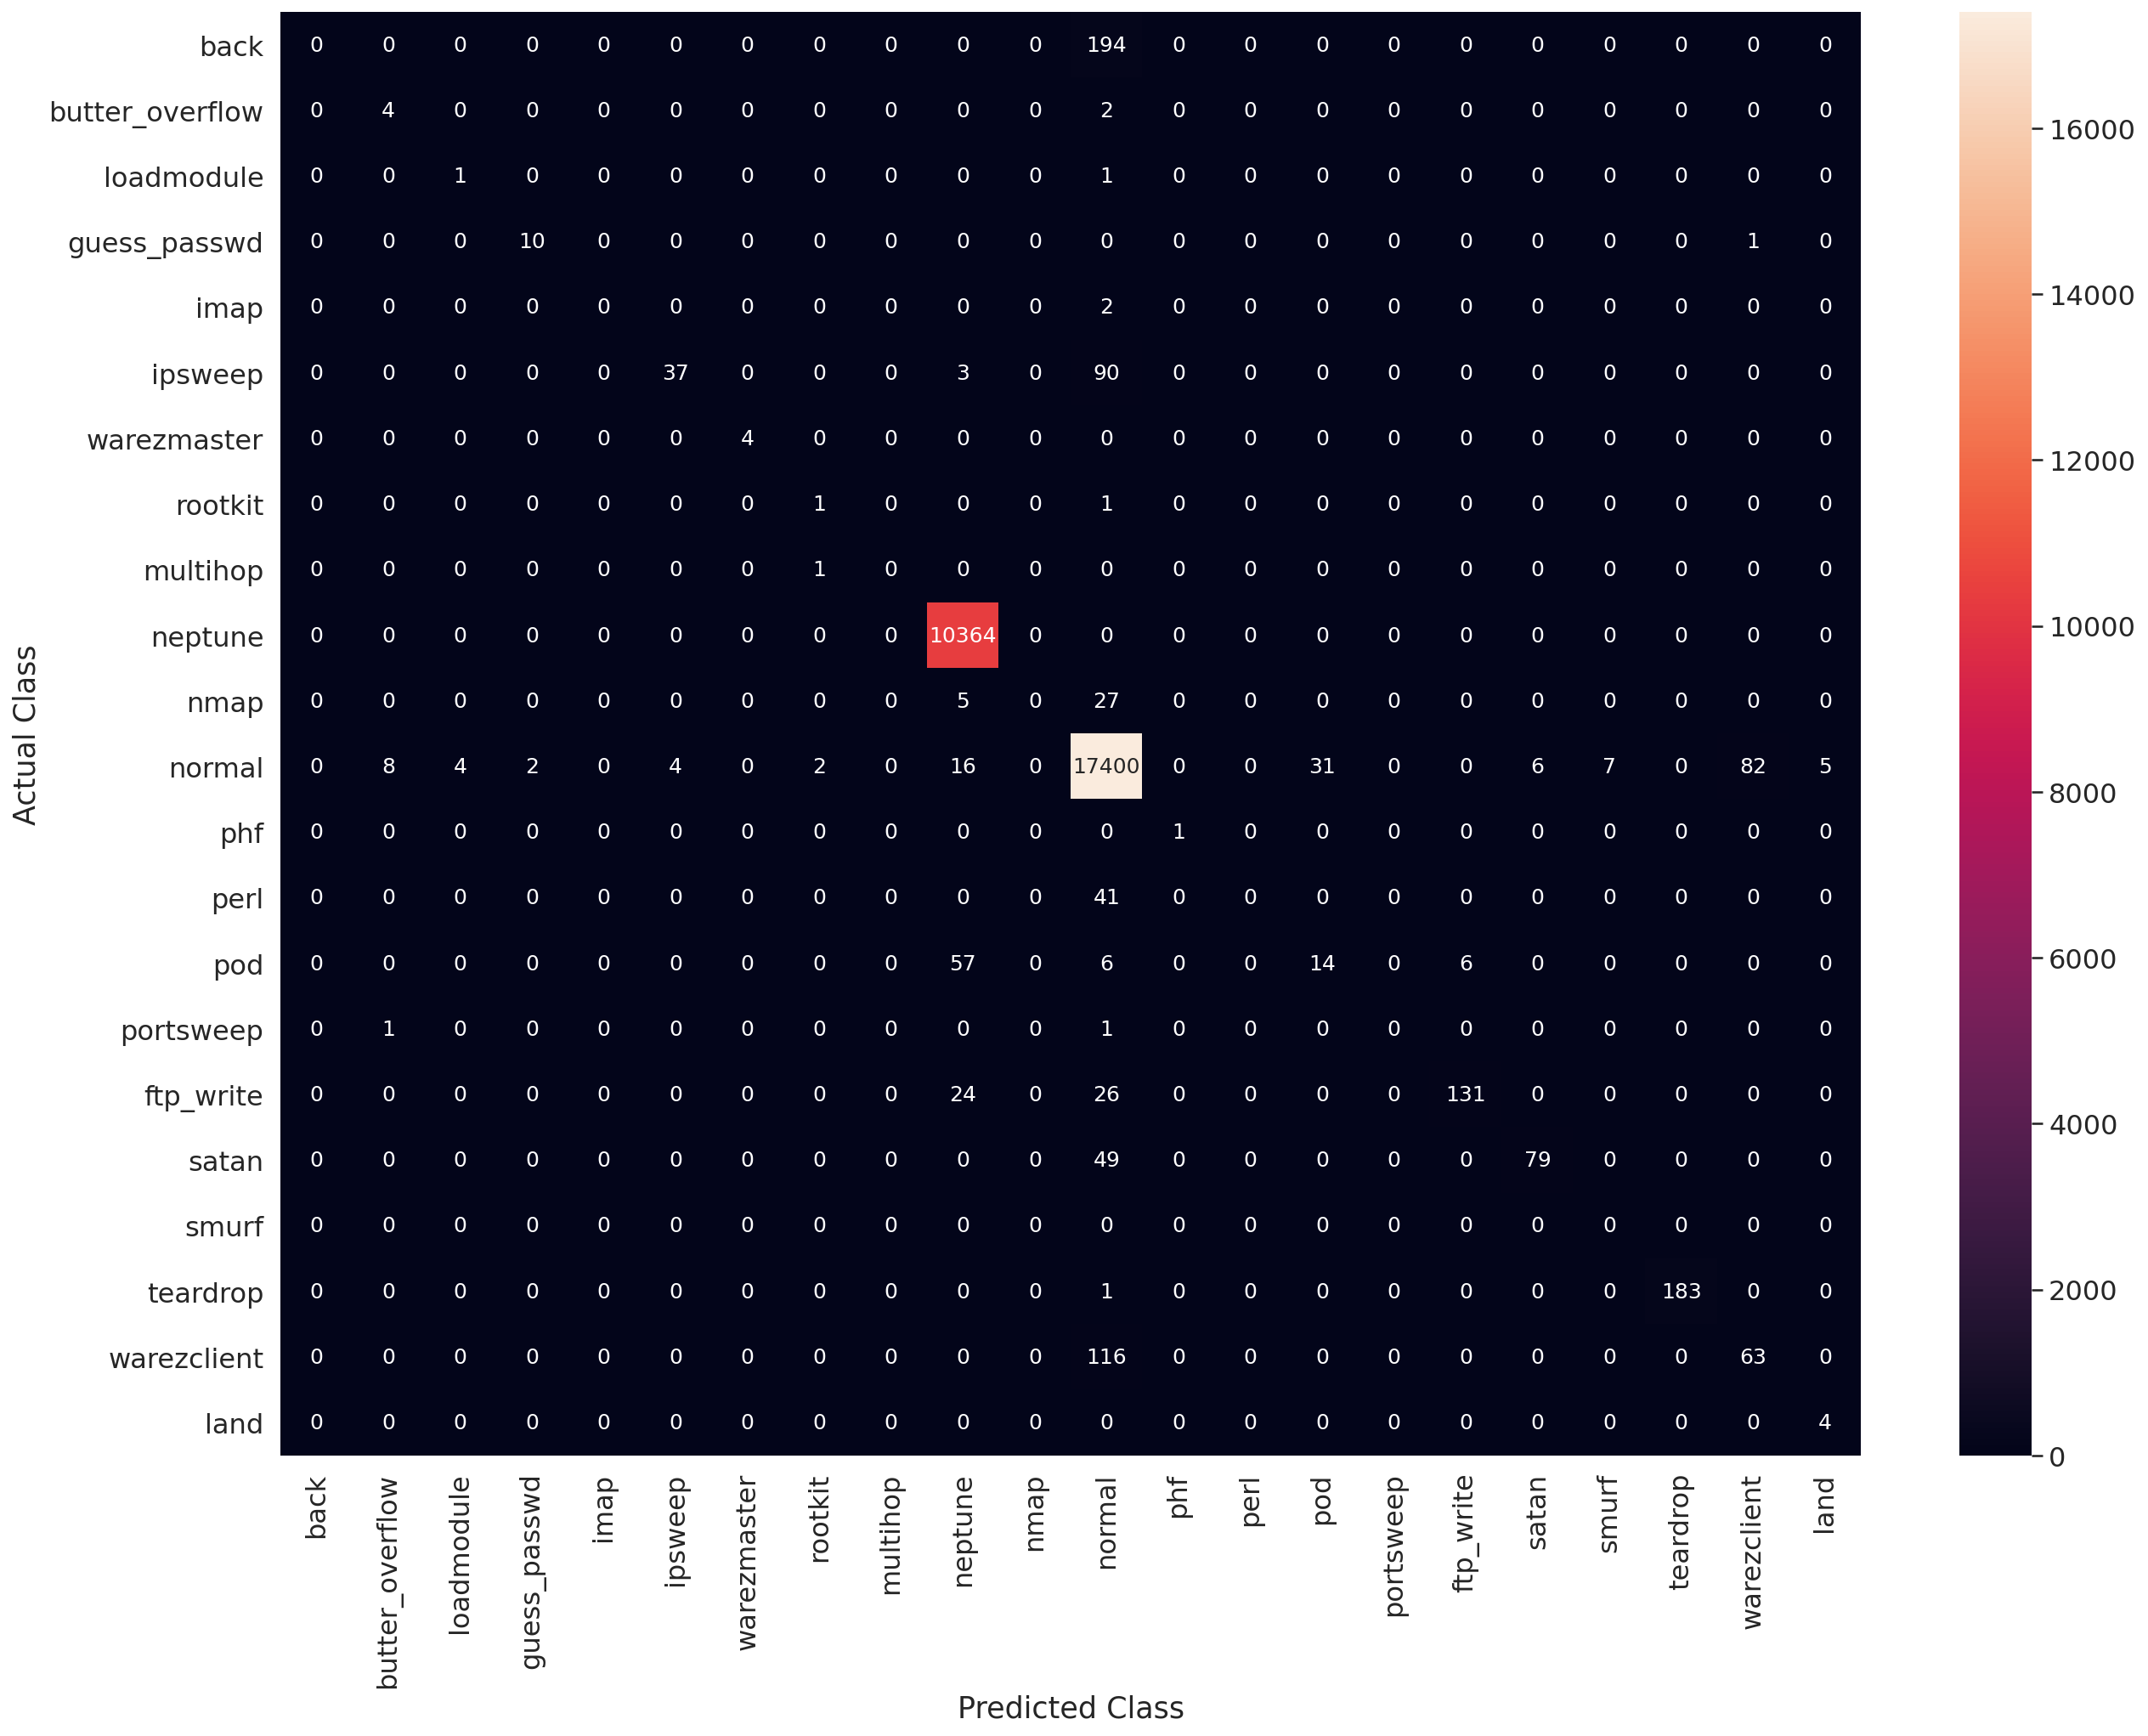

Precision score is:


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.961510325563247
Recall score is:


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.9717700391510405
F1-score is:
0.9654822875651214
---------------------------
|      Best Estimator     |
---------------------------

	GaussianNB(priors=None, var_smoothing=10)

---------------------------
|     Best parameters     |
---------------------------
	Parameters of best estimator : 

	{'var_smoothing': 10}

----------------------------------
|   No of CrossValidation sets   |
----------------------------------

	Total numbre of cross validation sets: 5

---------------------------
|        Best Score       |
---------------------------

	Average Cross Validate scores of best estimator : 

	0.9714256254896656



In [ ]:
nbm_outcome = nbm(x_train, y_train, x_test, y_test, hyperparameter)

In [ ]:
# Print Output for Naive Bayes Model
print(nbm_outcome[0])
print(nbm_outcome[1])
print(nbm_outcome[2])
print(nbm_outcome[3])
print(nbm_outcome[4])
print(nbm_outcome[5])
print(nbm_outcome[6])

GridSearchCV(cv=5, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                           0.0001, 0.001, 0.01, 0.1, 1, 10,
                                           100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)
{'tp': 69649, 'tpr': 0.9912331886429944, 'fp': 2218, 'fpr': 0.04800554076575114}
{'precision': 0.9615582273024715, 'recall': 0.9723099907270667, 'f1_score': 0.9658669685547009}
{'tp': 17400, 'tpr': 0.99049353902203, 'fp': 557, 'fpr': 0.048220933252532246}
{'precision': 0.961510325563247, 'recall': 0.9717700391510405, 'f1_score': 0.9654822875651214, 'model': <function model at 0x7fb88ecb71e0>}
1614002797.824241
1614002846.602295


In [ ]:
from sklearn.tree import DecisionTreeClassifier 

In [ ]:
def dtc(x_train_1, y_train, x_test_1, y_test, hyperparameter):
  # Decision Tree 
  # clfd = DecisionTreeClassifier(criterion ="entropy", max_depth = 4) 
  clfd = DecisionTreeClassifier(criterion='gini', splitter='best',class_weight='balanced') 
  clfd_grid =  GridSearchCV(clfd, param_grid=hyperparameter, cv=3, verbose=1, n_jobs=-1)
  start_time = time.time() 
  # clfd.fit(x_train, y_train.values.ravel()) 
  
  clfd_grid_results_train, clfd_grid_results_test = model(clfd_grid, x_train_1.toarray(), y_train, x_test_1.toarray(), y_test)  
  
  # clfd_grid_results = model(clfd_grid, x_train_1.toarray(), y_train, x_test_1.toarray(), y_test)  

  end_time = time.time() 
  # print("Training time: ", end_time-start_time) 

  print_grid_search_attributes(clfd_grid)

  joblib.dump(clfd_grid.best_estimator_, 'clfd_gs.pkl')

  clfd_gs = clfd_grid.best_estimator_
  
  y_tr_pred = clfd_gs.predict(x_train_1.toarray())
  y_test_pred = clfd_gs.predict(x_test_1.toarray())
  
  clfd_tpr_fpr_train = tpr_fpr_func(y_train, y_tr_pred)
  clfd_tpr_fpr_test = tpr_fpr_func(y_test, y_test_pred)


  # return clfg_results, clfg_grid, tpr_fpr_train, clfg_grid_results_train, tpr_fpr_test, clfg_grid_results_test, start_time, end_time, end_time-start_time
  return clfd_grid, clfd_tpr_fpr_train, clfd_grid_results_train, clfd_tpr_fpr_test, clfd_grid_results_test, start_time, end_time, end_time-start_time

In [ ]:
hyperparameter = {'max_depth':[5, 10, 20, 50, 100, 500], 'min_samples_split':[5, 10, 100, 500]}

Fitting the model and prediction on train data:
Fitting 3 folds for each of 24 candidates, totalling 72 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   59.7s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  1.6min finished


Completed
Time taken: 0:01:40.658413
Prediction on test data:
Completed
Time taken: 0:00:00.014428
Performance metrics:
Confusion Matrix is:


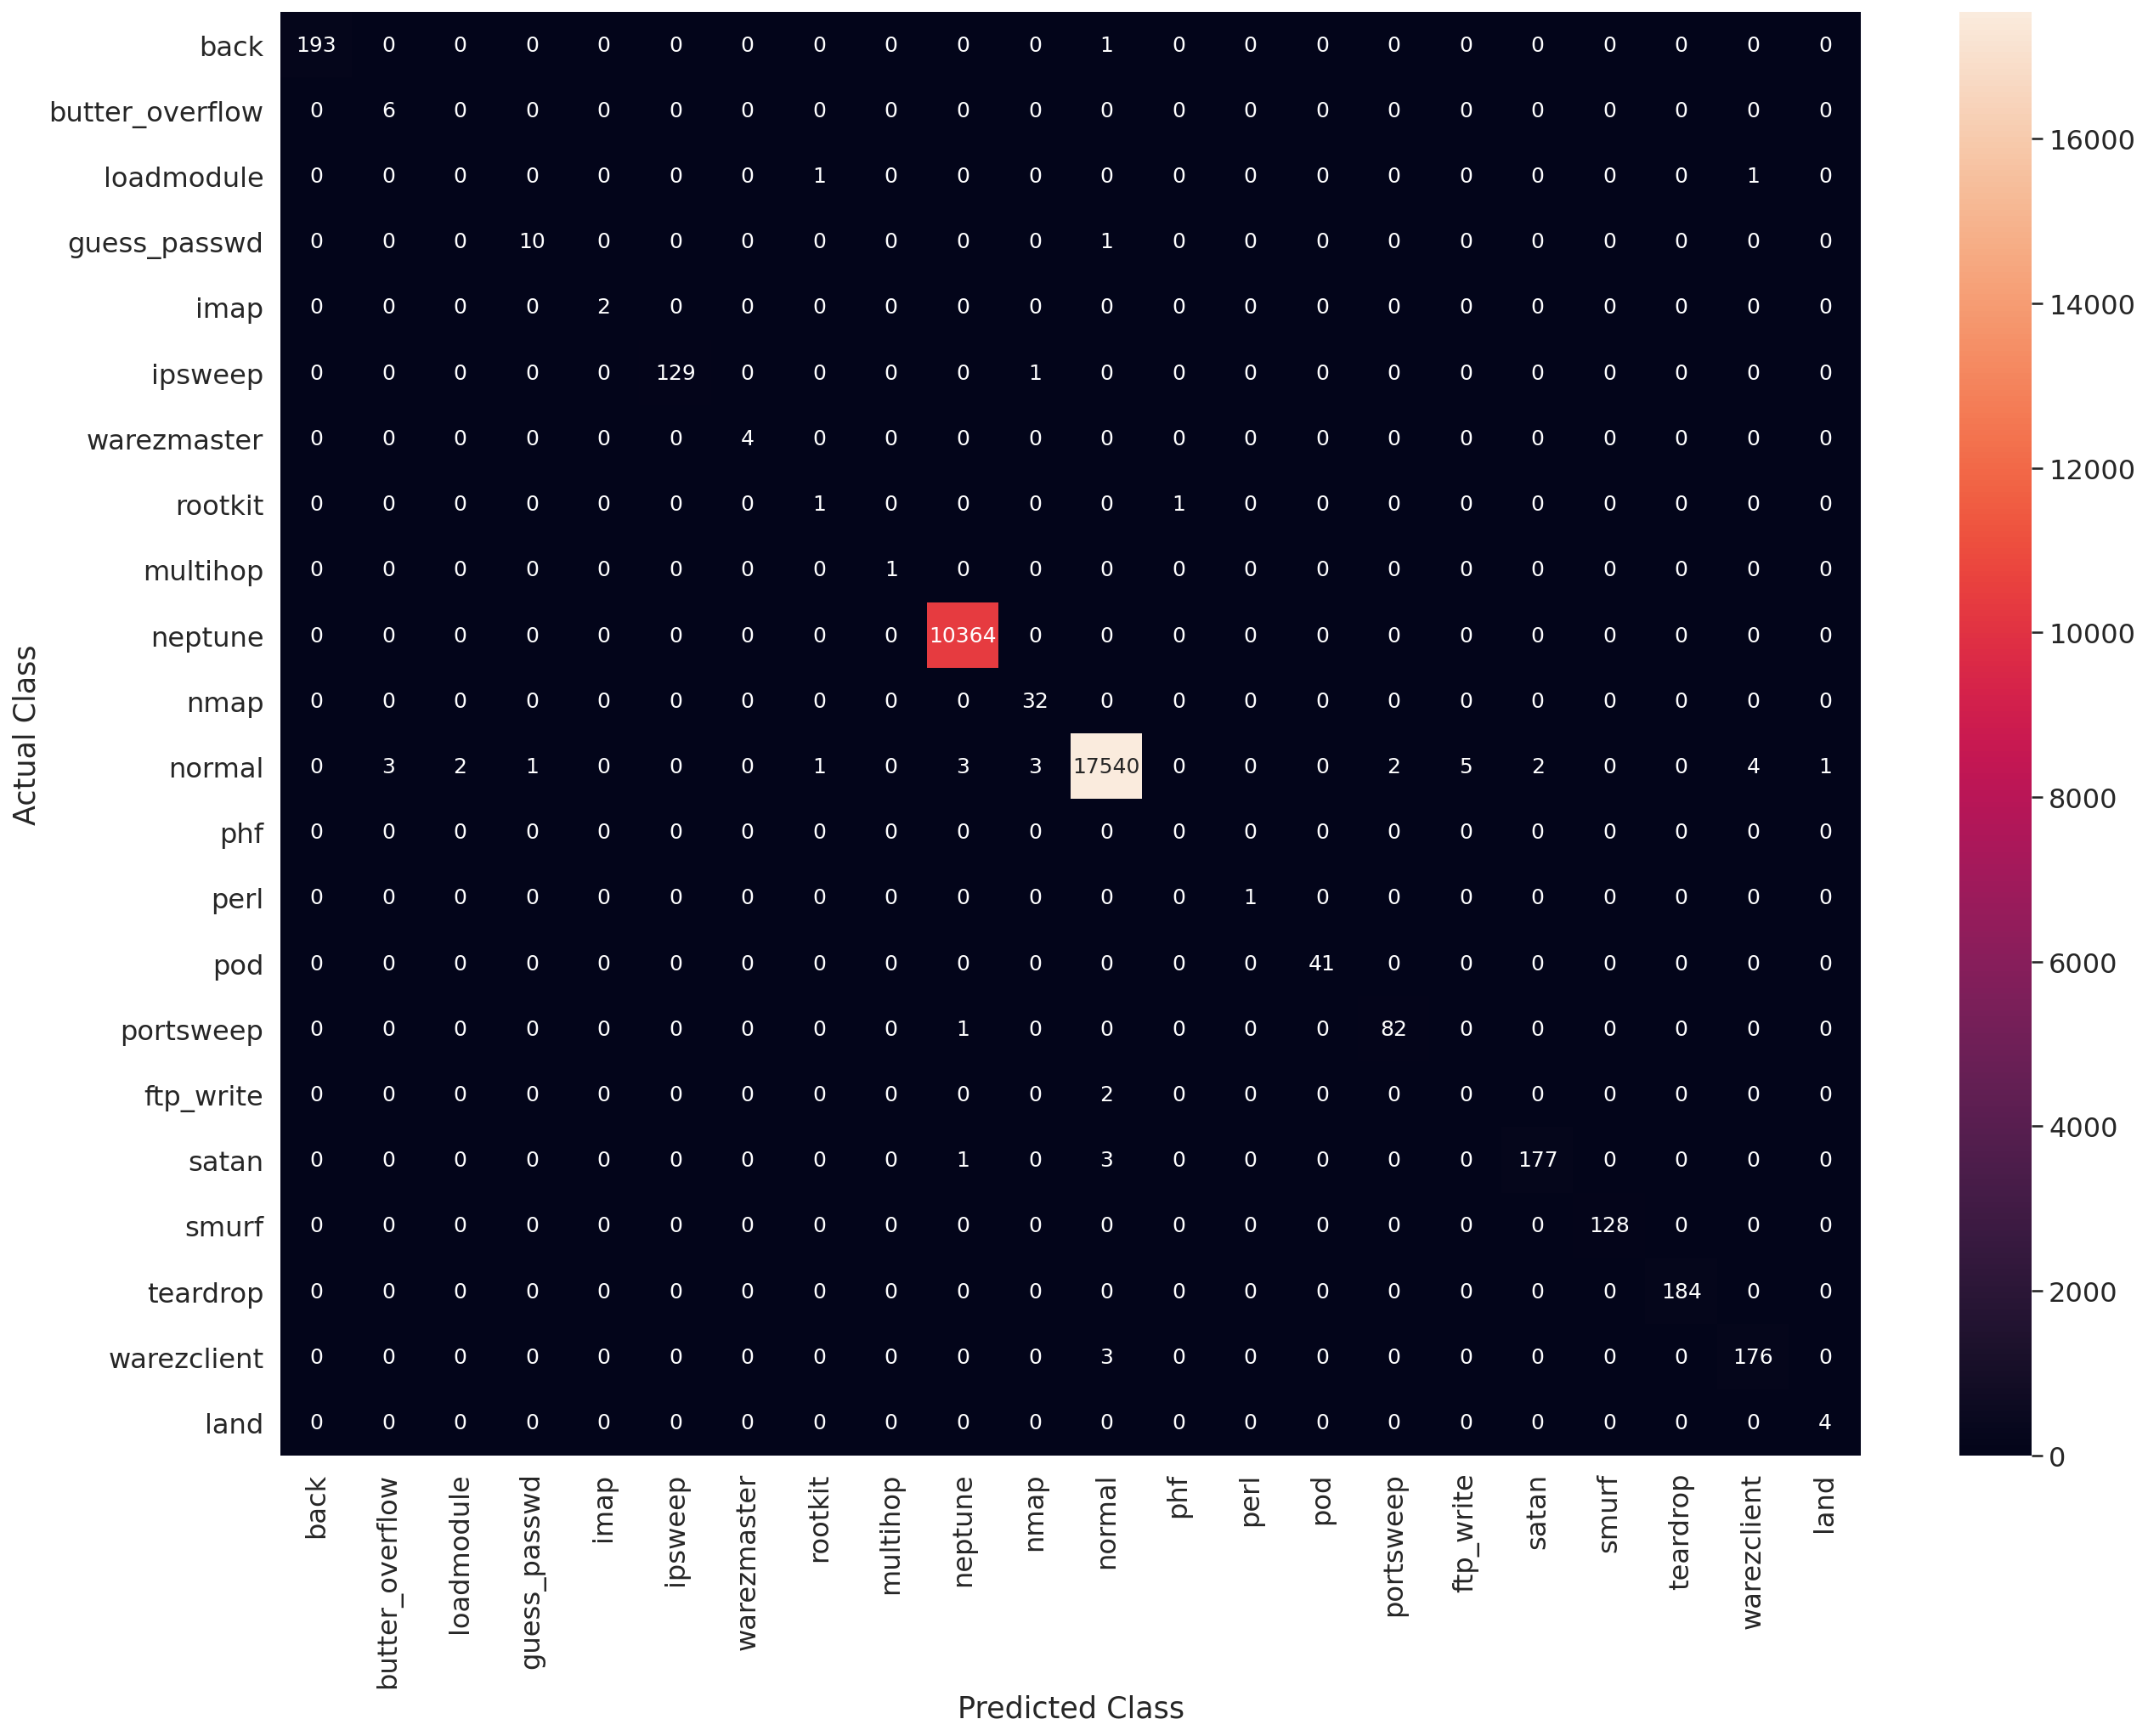

Precision score is:
0.9987416906143346


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall score is:
0.9985232502232296
F1-score is:
0.9986185921025292
---------------------------
|      Best Estimator     |
---------------------------

	DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=100, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

---------------------------
|     Best parameters     |
---------------------------
	Parameters of best estimator : 

	{'max_depth': 100, 'min_samples_split': 5}

----------------------------------
|   No of CrossValidation sets   |
----------------------------------

	Total numbre of cross validation sets: 3

---------------------------
|        Best Score       |
---------------------------

	Average Cross V

In [ ]:
dtc_outcome = dtc(x_train_1, y_train, x_test_1, y_test, hyperparameter)

In [ ]:
# Print Output for DTC Model
print(dtc_outcome[0])
print(dtc_outcome[1])
print(dtc_outcome[2])
print(dtc_outcome[3])
print(dtc_outcome[4])
print(dtc_outcome[5])
print(dtc_outcome[6])

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'ma

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import SGDClassifier

In [ ]:
def lr(x_train_1, y_train, x_test_1, y_test, hyperparameter):
  clfl = SGDClassifier(loss='log') # LogisticRegression(max_iter = 1200000) 
  clfl_grid = GridSearchCV(clfl, param_grid=hyperparameter, cv=5, verbose=1, n_jobs=-1)
  start_time = time.time() 
  # clfl.fit(X_train, y_train.values.ravel()) 
  clfl_grid_results_train, clfl_grid_results_test = model(clfl_grid, x_train_1.toarray(), y_train, x_test_1.toarray(), y_test) #GridSearchCV(lr, param_grid=hyperparameter, cv=5, verbose=1, n_jobs=-1)
  end_time = time.time() 
  # print("Training time: ", end_time-start_time)

  print_grid_search_attributes(clfl_grid)

  joblib.dump(clfl_grid.best_estimator_, 'clfl_gs.pkl')

  clfl_gs = clfl_grid.best_estimator_

  y_tr_pred = clfl_gs.predict(x_train_1.toarray())
  y_test_pred = clfl_gs.predict(x_test_1.toarray())
  
  clfl_tpr_fpr_train = tpr_fpr_func(y_train, y_tr_pred)
  clfl_tpr_fpr_test = tpr_fpr_func(y_test, y_test_pred)



  return clfl_grid, clfl_tpr_fpr_train, clfl_grid_results_train, clfl_tpr_fpr_test, clfl_grid_results_test, start_time, end_time, end_time-start_time


  # lr = SGDClassifier(loss='log')
  

In [ ]:
hyperparameter = {'alpha':[0.001, 0.01, 0.1, 1, 10, 20, 30], 'penalty':['l1', 'l2']}

Fitting the model and prediction on train data:
Fitting 5 folds for each of 14 candidates, totalling 70 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed: 17.4min finished


Completed
Time taken: 0:17:52.416352


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Prediction on test data:
Completed
Time taken: 0:00:00.026553
Performance metrics:
Confusion Matrix is:


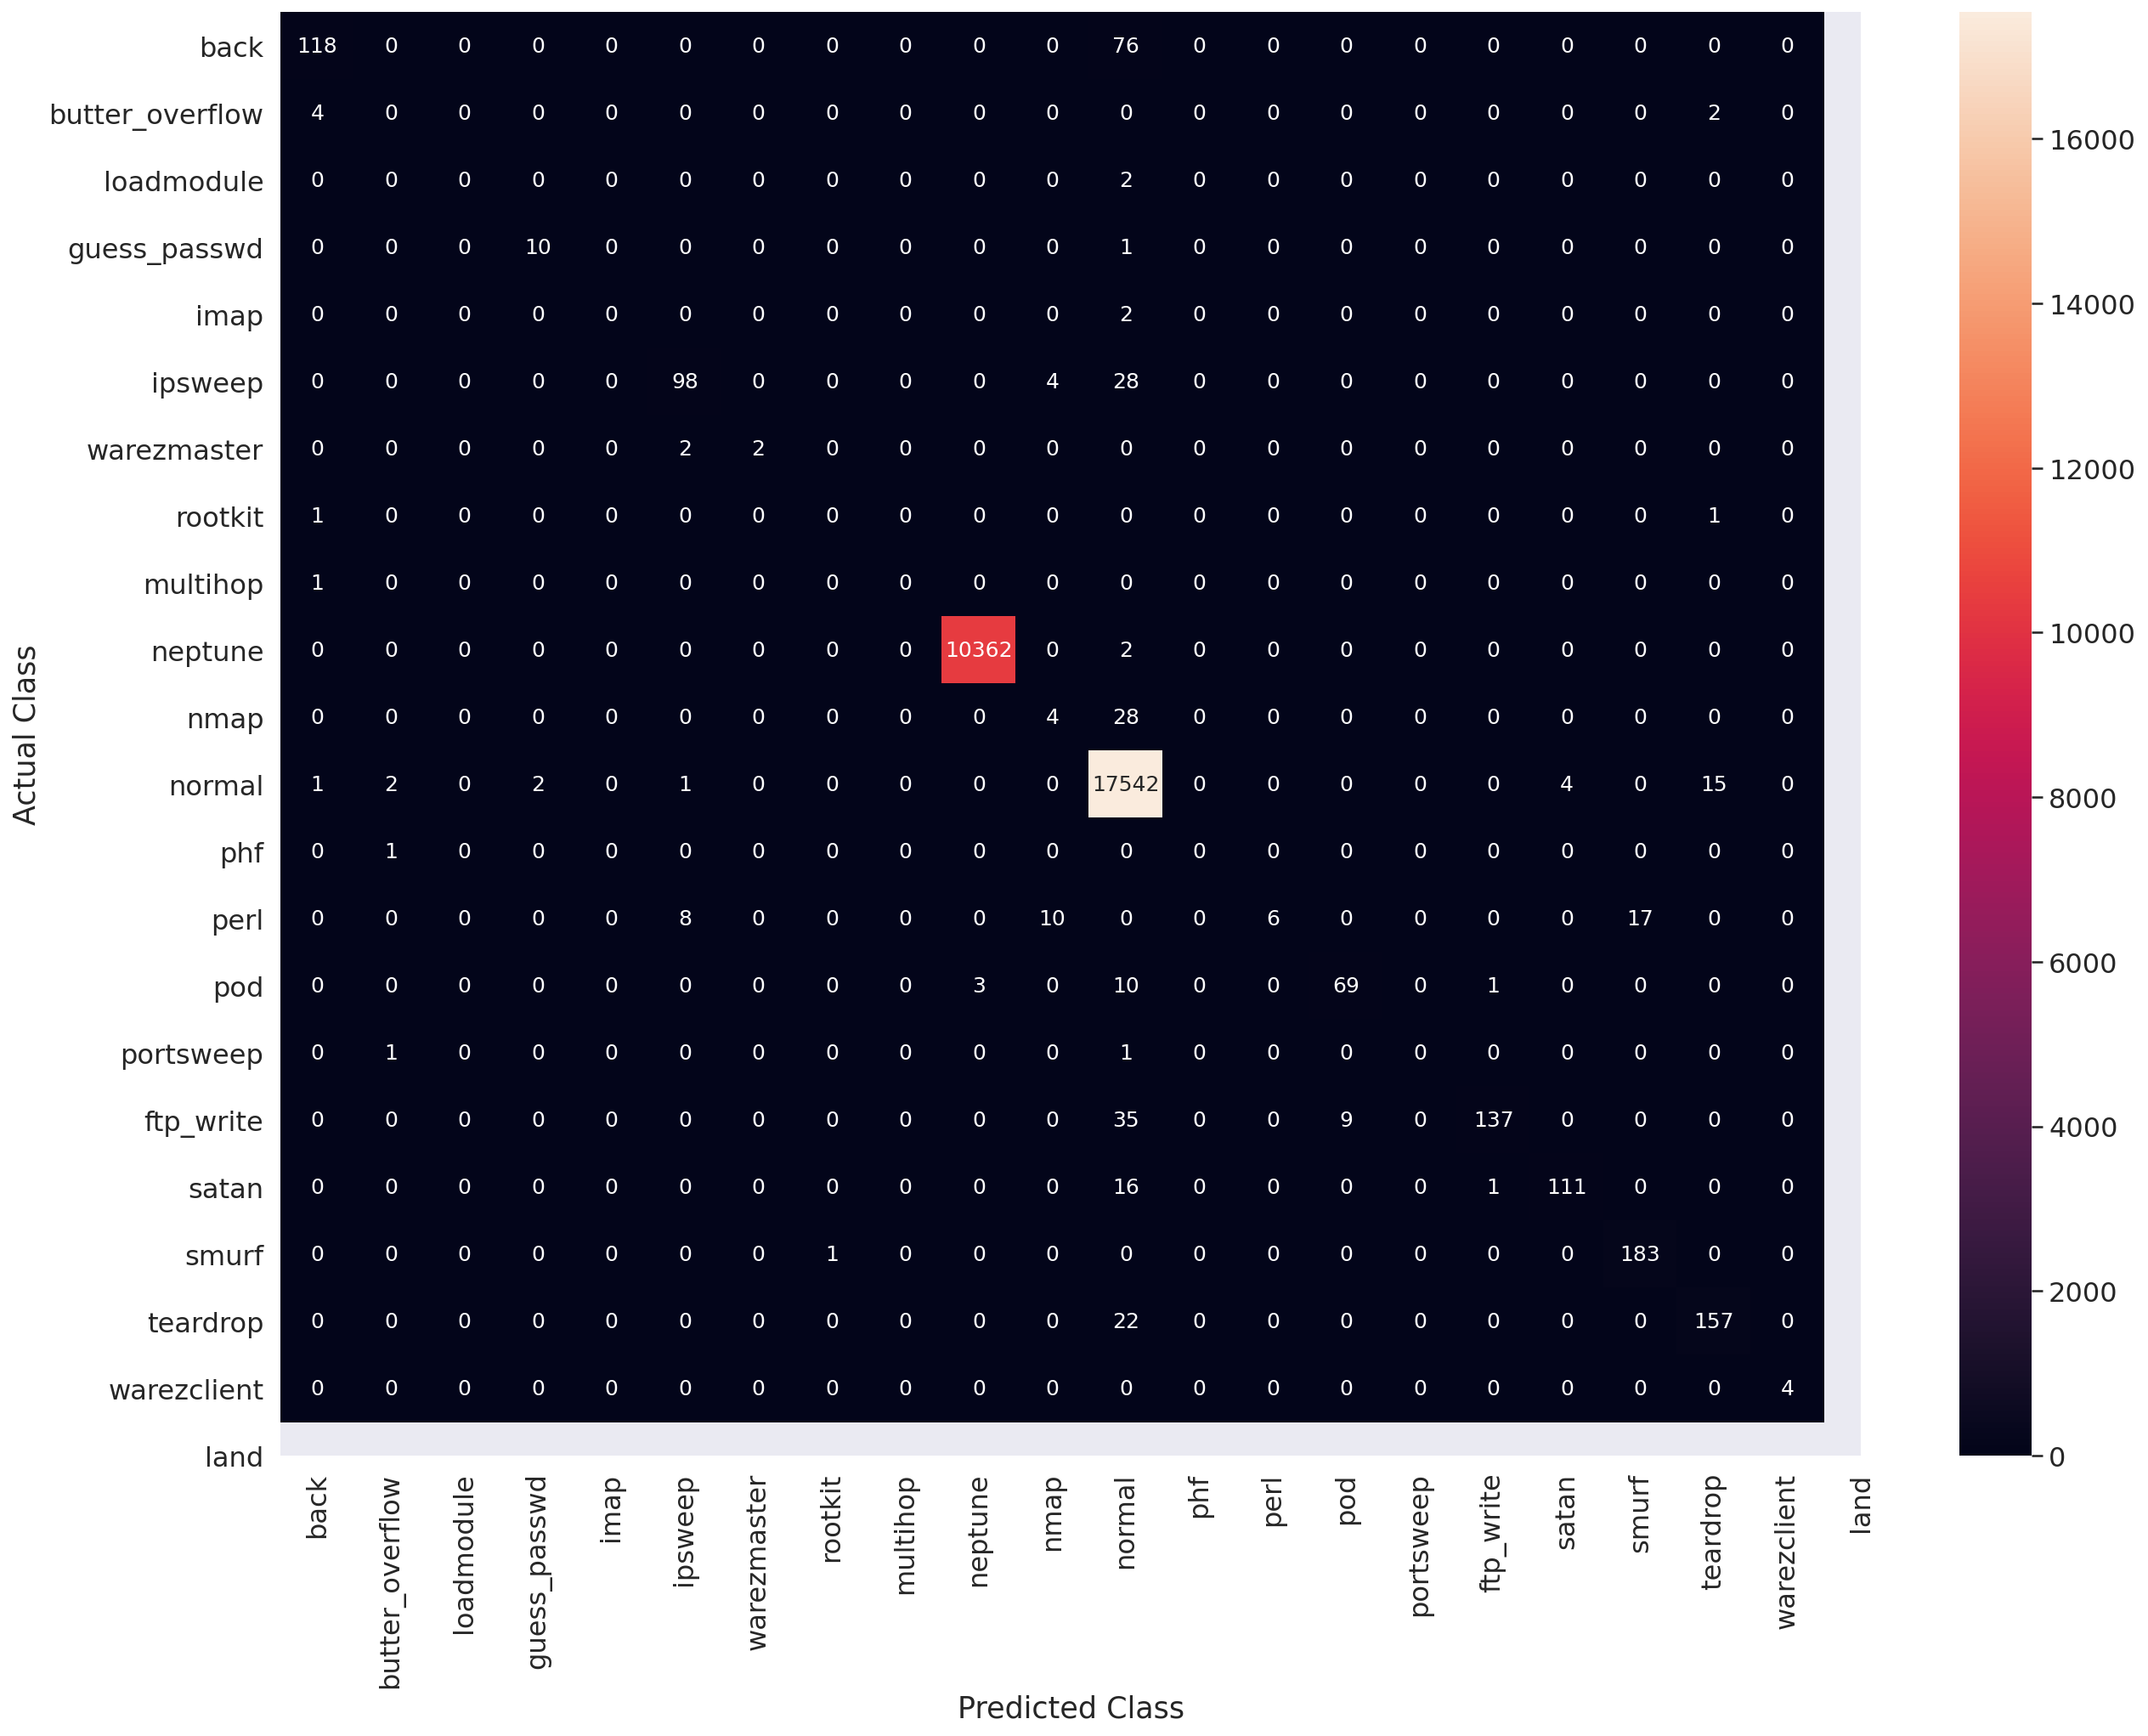

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision score is:
0.98829230743755
Recall score is:
0.9891819493097054
F1-score is:
0.9878549613158663
---------------------------
|      Best Estimator     |
---------------------------

	SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l1', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

---------------------------
|     Best parameters     |
---------------------------
	Parameters of best estimator : 

	{'alpha': 0.001, 'penalty': 'l1'}

----------------------------------
|   No of CrossValidation sets   |
----------------------------------

	Total numbre of cross validation sets: 5

---------------------------
|        Best Score       |
---------------------------


In [ ]:
lr_outcome = lr(x_train_1, y_train, x_test_1, y_test, hyperparameter)

In [ ]:
# Print Output for LR Model
print(lr_outcome[0])
print(lr_outcome[1])
print(lr_outcome[2])
print(lr_outcome[3])
print(lr_outcome[4])
print(lr_outcome[5])
print(lr_outcome[6])

GridSearchCV(cv=5, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='log', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 20, 30],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scor

In [ ]:
# Simple Logistic regression
def slr(x_train_1, y_train, x_test_1, y_test, hyperparameter):
  clfl = LogisticRegression(max_iter = 1200000) 

  start_time1 = time.time() 
  clfl.fit(x_train_1, y_train.values.ravel()) 

  end_time1 = time.time() 

  start_time2 = time.time() 
  y_test_pred = clfl.predict(x_train_1) 
  end_time2 = time.time() 
  print("Testing time: ", end_time2-start_time2) 

   
  print("Train score is:", clfl.score(x_train_1, y_train)) 
  print("Test score is:", clfl.score(x_test_1, y_test)) 

  return clfl, y_test_pred, start_time1, end_time1, end_time1-start_time1, start_time2, end_time2, end_time2-start_time2  

In [ ]:
hyperparameter = 1200000

In [ ]:
slr_outcome = slr(x_train_1, y_train, x_test_1, y_test, hyperparameter)

Testing time:  0.3155665397644043
Train score is: 0.9979135899989696
Test score is: 0.9969091283742015


In [ ]:
# Print Output for DTC Model
print(slr_outcome[0])
print(slr_outcome[1])
print(slr_outcome[2])
print(slr_outcome[3])
print(slr_outcome[4])
print(slr_outcome[5])
print(slr_outcome[6])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1200000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
['normal.' 'neptune.' 'normal.' ... 'neptune.' 'normal.' 'normal.']
1614011745.6878042
1614012447.773186
702.0853817462921
1614012447.7731862
1614012448.0887527


In [ ]:
  from sklearn.svm import SVC 
  

In [ ]:
# SVM

def svmc(x_train_1, y_train, x_test_1, y_test, hyperparameter):
  clfsvm = SGDClassifier(loss='hinge') #SVC(gamma = 'scale')
  clfsvm_grid = GridSearchCV(clfsvm, param_grid=hyperparameter, cv=5, verbose=1, n_jobs=-1)

  start_time = time.time() 
  # clfs.fit(X_train, y_train.values.ravel()) 
  clfsvm_grid_results_train, clfsvm_grid_results_test = model(clfsvm_grid, x_train_1.toarray(), y_train, x_test_1.toarray(), y_test)

  end_time = time.time() 
  # print("Training time: ", end_time-start_time)


  print_grid_search_attributes(clfsvm_grid)

  joblib.dump(clfsvm_grid.best_estimator_, 'clfsvm_gs.pkl')

  clfsvm_gs = clfsvm_grid.best_estimator_

  y_tr_pred = clfsvm_gs.predict(x_train_1.toarray())
  y_test_pred = clfsvm_gs.predict(x_test_1.toarray())
  
  clfsvm_tpr_fpr_train = tpr_fpr_func(y_train, y_tr_pred)
  clfsvm_tpr_fpr_test = tpr_fpr_func(y_test, y_test_pred)



  return clfsvm_grid, clfsvm_tpr_fpr_train, clfsvm_grid_results_train, clfsvm_tpr_fpr_test, clfsvm_grid_results_test, start_time, end_time, end_time-start_time


In [ ]:
hyperparameter = {'alpha':[10**x for x in range(-8,3)], 'penalty':['l1', 'l2']}

Fitting the model and prediction on train data:
Fitting 5 folds for each of 22 candidates, totalling 110 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed: 32.7min finished


Completed
Time taken: 0:33:58.743695


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Prediction on test data:
Completed
Time taken: 0:00:00.023911
Performance metrics:
Confusion Matrix is:


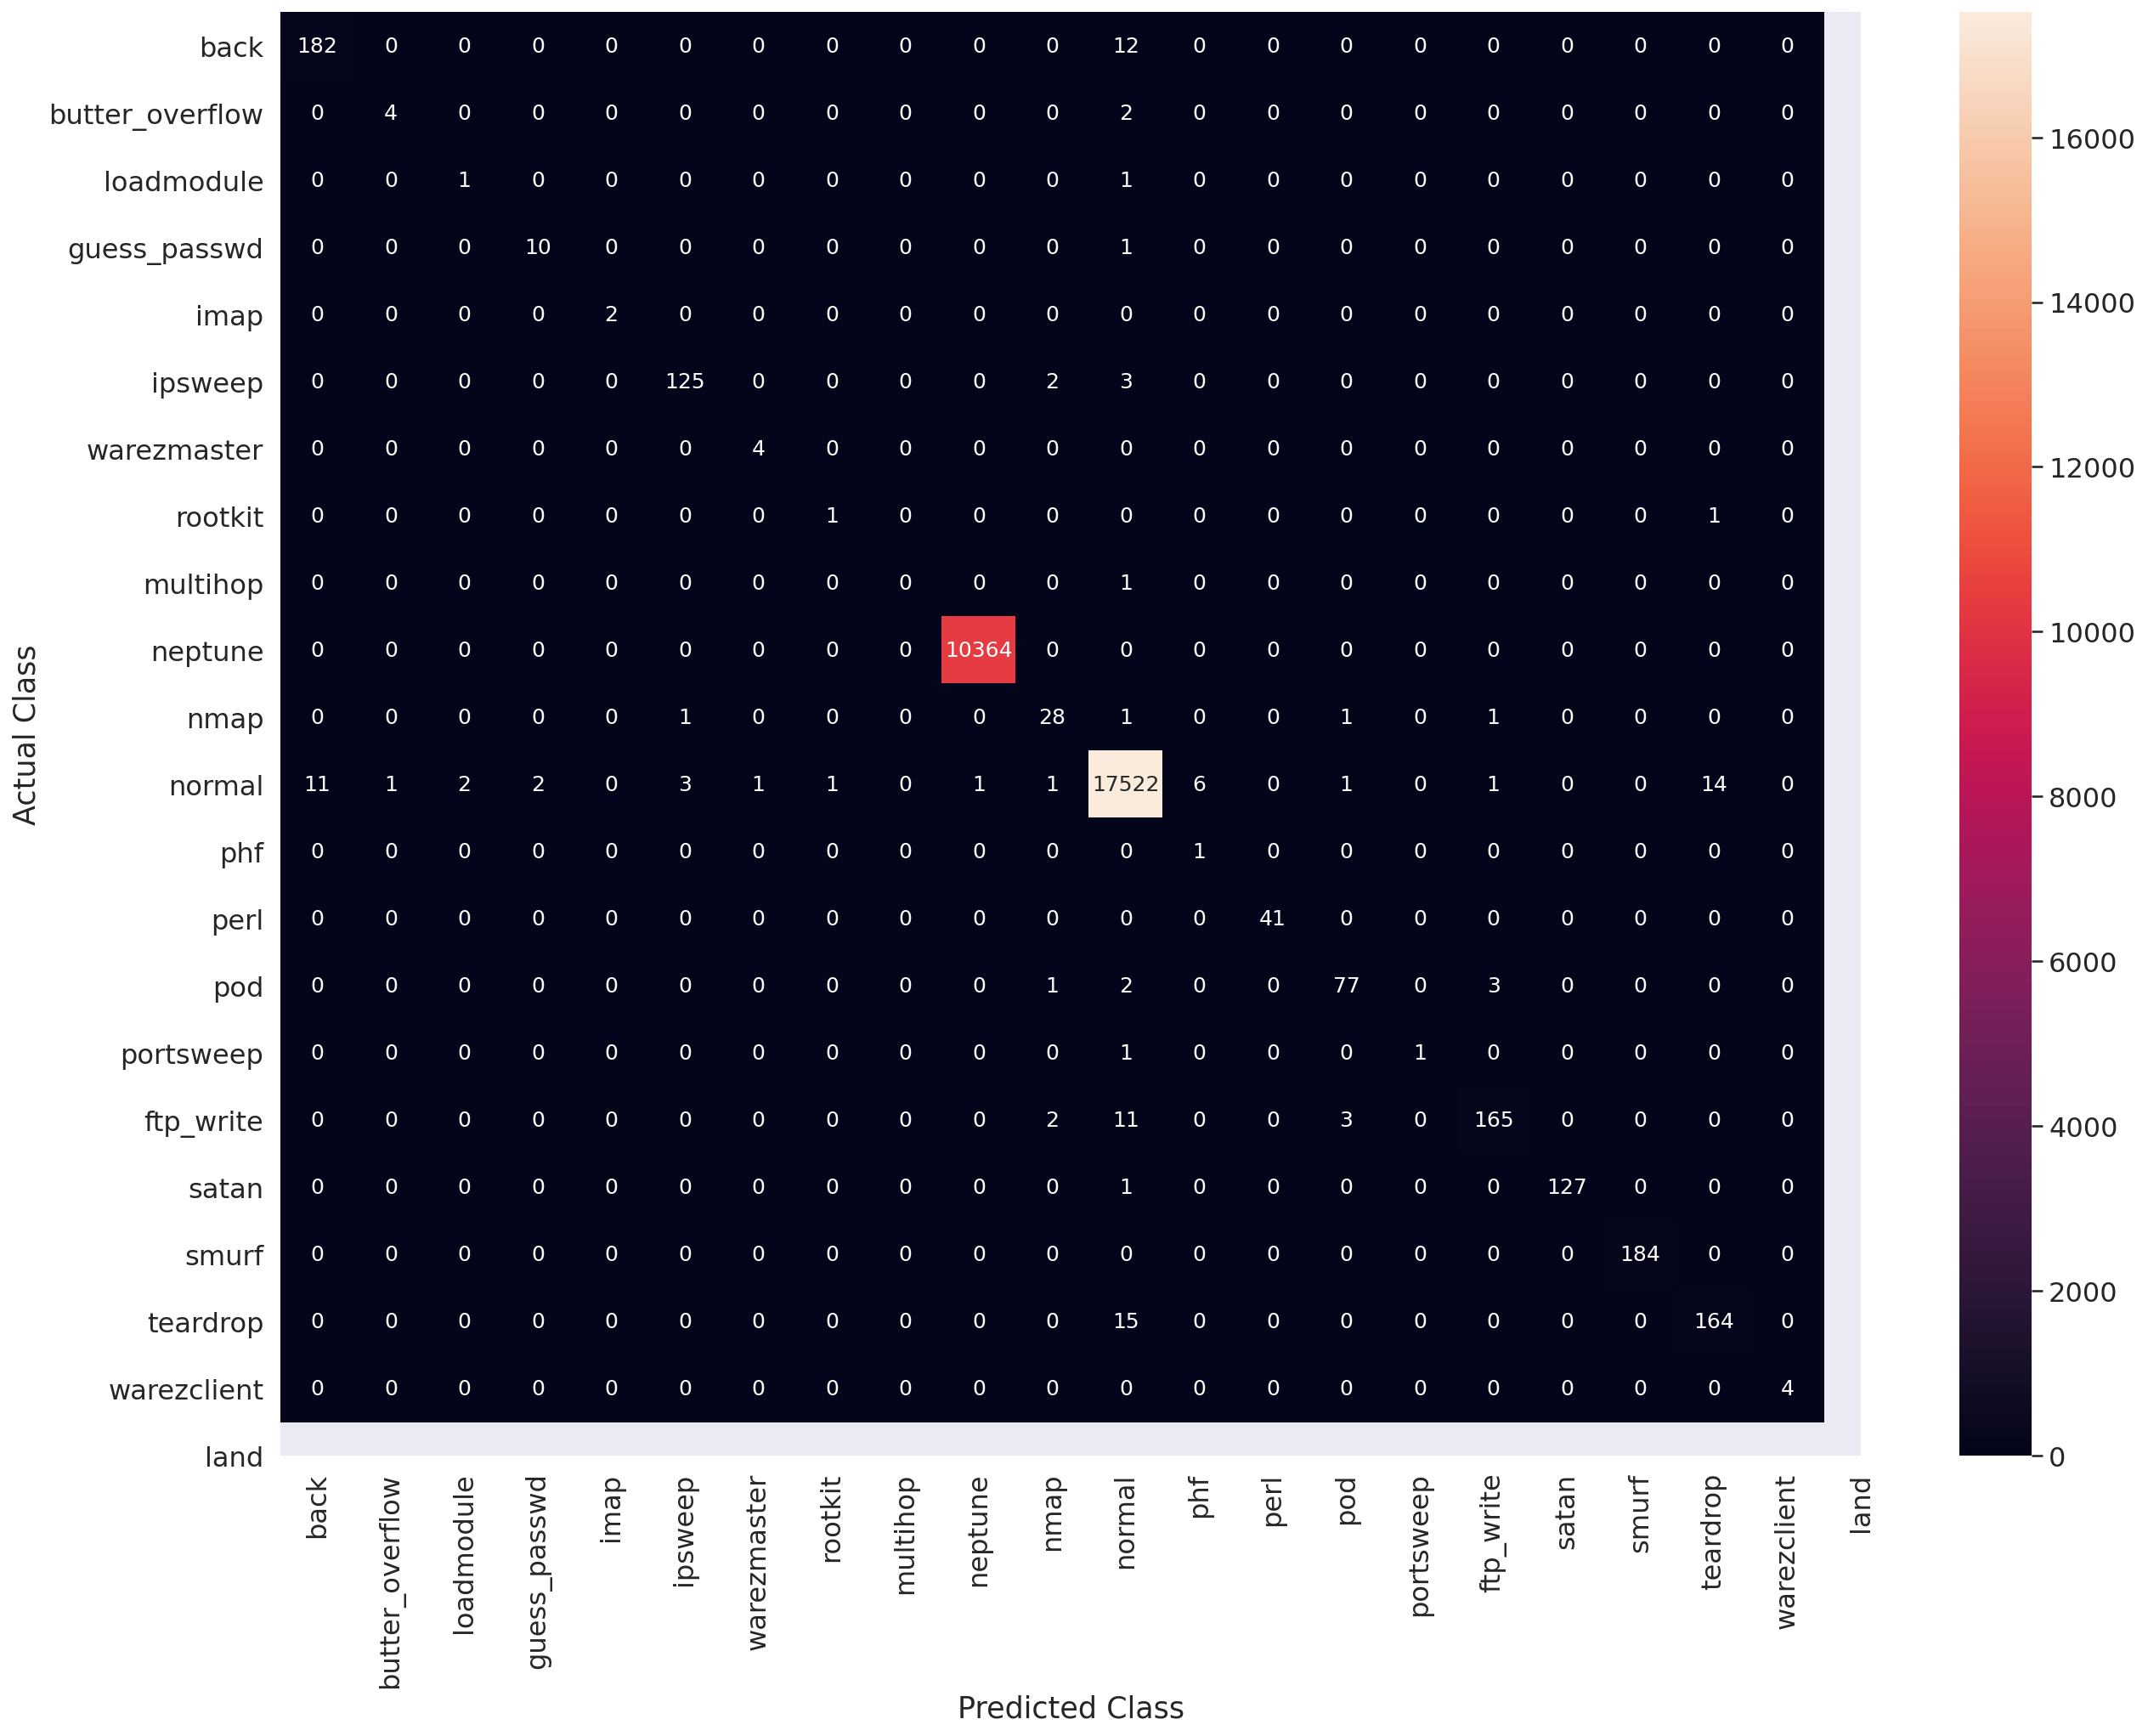

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision score is:
0.9963553174536698
Recall score is:
0.9961879249948485
F1-score is:
0.9962434244617784
---------------------------
|      Best Estimator     |
---------------------------

	SGDClassifier(alpha=1e-06, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l1',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

---------------------------
|     Best parameters     |
---------------------------
	Parameters of best estimator : 

	{'alpha': 1e-06, 'penalty': 'l1'}

----------------------------------
|   No of CrossValidation sets   |
----------------------------------

	Total numbre of cross validation sets: 5

---------------------------
|        Best Score       |
------------------------

In [ ]:
svmc_outcome = svmc(x_train_1, y_train, x_test_1, y_test, hyperparameter)

In [ ]:
# Print Output for DTC Model
print(svmc_outcome[0])
print(svmc_outcome[1])
print(svmc_outcome[2])
print(svmc_outcome[3])
print(svmc_outcome[4])
print(svmc_outcome[5])
print(svmc_outcome[6])

GridSearchCV(cv=5, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             pre_dispat

In [ ]:
# Simple SVM

from sklearn.svm import SVC 

def ssvmc(x_train_1, y_train, x_test_1, y_test, hyperparameter):
  
  clfs = SVC(gamma = 'scale') 
  start_time1 = time.time() 
  clfs.fit(x_train_1, y_train.values.ravel()) 
  end_time1 = time.time() 
  print("Training time: ", end_time1-start_time1) 
   
  start_time2 = time.time() 
  y_test_pred = clfs.predict(x_train_1) 
  end_time2 = time.time() 
  print("Testing time: ", end_time2-start_time2) 

   
  print("Train score is:", clfs.score(x_train_1, y_train)) 
  print("Test score is:", clfs.score(x_test_1, y_test)) 



  return clfs, y_test_pred, start_time1, end_time1, end_time1-start_time1, start_time2, end_time2, end_time2-start_time2 


In [ ]:
ssvmc_outcome = ssvmc(x_train_1, y_train, x_test_1, y_test, hyperparameter)

Training time:  69.99375820159912
Testing time:  32.66218590736389
Train score is: 0.9981883435793523
Test score is: 0.9976646747716189


In [ ]:
# Print Output for SSVM Model
print(ssvmc_outcome[0])
print(ssvmc_outcome[1])
print(ssvmc_outcome[2])
print(ssvmc_outcome[3])
print(ssvmc_outcome[4])
print(ssvmc_outcome[5])
print(ssvmc_outcome[6])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
['normal.' 'neptune.' 'normal.' ... 'neptune.' 'normal.' 'normal.']
1614015783.4245746
1614015853.4183328
69.99375820159912
1614015853.4185112
1614015886.080697
